0_neda_mimfpt_all_regression_models

Engin Abdan

### Import

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import skew

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

### Data

In [50]:
df = pd.read_excel("std_ins_ml_data.xlsx")

### Data Info

In [51]:
df.head(2)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap
1,1,12,18,26,13,22,17,17,14,0,68,Spa


In [52]:
df = df.drop(columns=["Unnamed: 0","MI_Cat"], axis=1)
df.head(2)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95
1,12,18,26,13,22,17,17,14,0,68


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0
Flight_Mean,100.0,75.00,12.092238,55.0,63.75,75.0,86.0,98.0


In [54]:
type(df.corr())

pandas.core.frame.DataFrame

In [55]:
df.corr()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
Ling_Int,1.000000,-0.098162,0.000735,-0.068698,-0.103412,0.100587,0.012451,0.124741,-0.091313,-0.080307
Math_Int,-0.098162,1.000000,0.004761,0.263387,0.087905,-0.023801,0.087261,-0.080008,0.069636,0.072900
Spa_Int,0.000735,0.004761,1.000000,-0.043324,0.054084,0.043194,-0.010617,-0.079160,-0.207011,-0.180365
Mus_Int,-0.068698,0.263387,-0.043324,1.000000,0.006284,-0.057392,-0.014819,-0.171671,0.072790,0.061492
Nat_Int,-0.103412,0.087905,0.054084,0.006284,1.000000,-0.216582,-0.202071,-0.102470,-0.050514,-0.090658
Body_Int,0.100587,-0.023801,0.043194,-0.057392,-0.216582,1.000000,0.197179,0.019206,-0.073203,-0.005005
Interp_Int,0.012451,0.087261,-0.010617,-0.014819,-0.202071,0.197179,1.000000,0.086464,-0.058546,0.048383
Intrap_Int,0.124741,-0.080008,-0.079160,-0.171671,-0.102470,0.019206,0.086464,1.000000,-0.071244,-0.037186
Plt_Or_Not,-0.091313,0.069636,-0.207011,0.072790,-0.050514,-0.073203,-0.058546,-0.071244,1.000000,0.867250
Flight_Mean,-0.080307,0.072900,-0.180365,0.061492,-0.090658,-0.005005,0.048383,-0.037186,0.867250,1.000000


In [56]:
a = []
b = []
for i in df.corr().columns:
    for k in df.corr().loc[:,i]:
        if abs(k) >= 0.9:
            a.append(k)
        else:
            b.append(k)
print(f"Strong_Corr \t: {a}" )
print(f"Weak_Corr \t: {b}" )

Strong_Corr 	: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Weak_Corr 	: [-0.09816177013828017, 0.0007345371969964949, -0.06869758318601726, -0.10341241733168519, 0.10058716704061625, 0.012450765314076791, 0.12474118582100657, -0.09131340981215223, -0.08030683262756651, -0.09816177013828017, 0.00476069688227437, 0.2633867913064584, 0.08790512890900118, -0.023800528475231113, 0.08726130236731322, -0.080007990412849, 0.06963578663429645, 0.07289999704889377, 0.0007345371969964949, 0.00476069688227437, -0.04332371252478464, 0.05408424555732783, 0.04319435622124602, -0.010617072664902864, -0.07915988683685925, -0.20701074274195216, -0.18036477258454398, -0.06869758318601726, 0.2633867913064584, -0.04332371252478464, 0.006284241754908033, -0.057391533213293315, -0.014819307828657707, -0.17167099025671959, 0.07279043658679342, 0.06149210698189992, -0.10341241733168519, 0.08790512890900118, 0.05408424555732783, 0.006284241754908033, -0.21658244632805532, -0.20207143994751595, -0.1024704

In [57]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


In [58]:
df.Plt_Or_Not.unique()

array([1, 0], dtype=int64)

In [59]:
df.Plt_Or_Not.value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

In [60]:
df.Flight_Mean.unique()

array([95, 68, 87, 66, 62, 84, 63, 58, 77, 75, 74, 79, 88, 89, 67, 59, 76,
       65, 96, 73, 61, 60, 57, 91, 80, 72, 93, 64, 97, 86, 78, 92, 90, 56,
       55, 85, 98, 83], dtype=int64)

In [61]:
df.Flight_Mean.nunique()

38

In [62]:
len(df)

100

In [63]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


### Regression Train Test

In [64]:
from sklearn.model_selection import train_test_split

X_reg = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y_reg = df["Flight_Mean"]
print(f"X_reg_shape \t: {X_reg.shape}")
print(f"y_reg_shape \t: {y_reg.shape}")
print("-"*40)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
print(f"X_reg_tain_shape \t: {X_reg_train.shape}")
print(f"X_reg_test_shape \t: {X_reg_test.shape}")
print(f"y_reg_tain_shape \t: {y_reg_train.shape}")
print(f"y_reg_test_shape \t: {y_reg_test.shape}")

X_reg_shape 	: (100, 8)
y_reg_shape 	: (100,)
----------------------------------------
X_reg_tain_shape 	: (70, 8)
X_reg_test_shape 	: (30, 8)
y_reg_tain_shape 	: (70,)
y_reg_test_shape 	: (30,)


### Classification Train Test

In [65]:
from sklearn.model_selection import train_test_split

X_cls = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y_cls = df["Flight_Mean"]
print(f"X_cls_shape \t: {X_cls.shape}")
print(f"y_cls_shape \t: {y_cls.shape}")
print("-"*40)

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
print(f"X_cls_tain_shape \t: {X_cls_train.shape}")
print(f"X_cls_test_shape \t: {X_cls_test.shape}")
print(f"y_cls_tain_shape \t: {y_cls_train.shape}")
print(f"y_cls_test_shape \t: {y_cls_test.shape}")

X_cls_shape 	: (100, 8)
y_cls_shape 	: (100,)
----------------------------------------
X_cls_tain_shape 	: (70, 8)
X_cls_test_shape 	: (30, 8)
y_cls_tain_shape 	: (70,)
y_cls_test_shape 	: (30,)


### Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [67]:
# MinMaxScaler for X_reg data
scaler_reg_min = MinMaxScaler()
X_reg_train_min_scl = scaler_reg_min.fit_transform(X_reg_train)
X_reg_test_min_scl = scaler_reg_min.transform(X_reg_test)

# StandardScaler for X_reg data
scaler_reg_std = StandardScaler()
X_reg_train_std_scl = scaler_reg_std.fit_transform(X_reg_train)
X_reg_test_std_scl = scaler_reg_std.transform(X_reg_test)

In [68]:
# MinMaxScaler for X_cls data
scaler_cls_min = MinMaxScaler ()
X_cls_train_min_scl = scaler_cls_min.fit_transform(X_cls_train)
X_cls_test_min_scl = scaler_cls_min.transform(X_cls_test)

# StandardScaler for X_cls data
scaler_cls_std = StandardScaler()
X_cls_train_std_scl = scaler_cls_std.fit_transform(X_cls_train)
X_cls_test_std_scl = scaler_cls_std.transform(X_cls_test)

### Polyfit

In [69]:
X_reg.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,20,19,10,16,13,16,17,22


In [70]:
def check_dist(X_reg, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=X_reg)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()

In [71]:
# for col in X_reg.columns:
#     check_dist(X_reg, col)

In [72]:
np.polyfit(X_reg.Ling_Int, y_reg, deg=3)
# b3--b2--b1--b0

array([-2.79738009e-02,  1.49097858e+00, -2.61369025e+01,  2.25688430e+02])

### PolynomialFeatures

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=3, include_bias=False)
poly_data = poly_trans.fit_transform(X_reg)
print(poly_data.shape)
print(X_reg.shape)

(100, 164)
(100, 8)


## Linear Regression

### Linear Regression

In [74]:
# lin_model for X_reg (Not Scaled)

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = lin_mod.predict(X_reg_test)
y_reg_train_prd = lin_mod.predict(X_reg_train)

In [75]:
lin_mod_scores = {"lm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                             "R2" : r2_score(y_reg_train, y_reg_train_prd),
                             "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                             "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "lm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                             "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                             "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                             "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

lin_mod_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_scrs

,lm_trn,lm_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [76]:
# lin_model for MinMaxScaler

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = lin_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = lin_mod.predict(X_reg_train_min_scl)

In [77]:
lin_mod_scores = {"lm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "lm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

lin_mod_min_scl_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_min_scl_scrs

,lm_mms_trn,lm_mms_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [78]:
# lin_model for StandardScaler

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = lin_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = lin_mod.predict(X_reg_train_std_scl)

In [79]:
lin_mod_scores = {"lm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "lm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

lin_mod_std_scl_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_std_scl_scrs

,lm_ss_trn,lm_ss_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [80]:
lin_mod_scrs = pd.concat([lin_mod_scrs, lin_mod_min_scl_scrs, lin_mod_std_scl_scrs], axis=1)
lin_mod_scrs

,lm_trn,lm_tst,lm_mms_trn,lm_mms_tst,lm_ss_trn,lm_ss_tst
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760


### Linear Regression & CV

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_cv = cross_validate(lin_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_mms_cv = cross_validate(lin_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_ss_cv = cross_validate(lin_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [84]:
lin_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
lin_mod_cv_scrs.rename(columns={0:"lm_cv_scr",
                                1:"lm_cv_mms_scr",
                                2:"lm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
lin_mod_cv_scrs

,lm_cv_scr,lm_cv_mms_scr,lm_cv_ss_scr
rmse,-13.537990,-13.537990,-13.537990
R2,-0.816103,-0.816103,-0.816103
mae,-11.886741,-11.886741,-11.886741
mse,-188.530002,-188.530002,-188.530002


In [85]:
lin_mod_cum_scrs = pd.concat([lin_mod_scrs, lin_mod_cv_scrs], axis=1)
lin_mod_cum_scrs.columns = ["lm_trn","lm_tst","lm_cv_scr","lm_mms_trn","lm_mms_tst","lm_cv_mms_scr","lm_ss_trn","lm_ss_tst","lm_cv_ss_scr"]
lin_mod_cum_scrs

,lm_trn,lm_tst,lm_cv_scr,lm_mms_trn,lm_mms_tst,lm_cv_mms_scr,lm_ss_trn,lm_ss_tst,lm_cv_ss_scr
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221,-13.537990,-13.537990,-13.537990
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987,-0.816103,-0.816103,-0.816103
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958,-11.886741,-11.886741,-11.886741
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760,-188.530002,-188.530002,-188.530002


## Ridge

### Ridge

In [86]:
# rid_mod for X_reg (Not scaled)
from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = rid_mod.predict(X_reg_test)
y_reg_train_prd = rid_mod.predict(X_reg_train)

In [87]:
rid_mod_scores = {"rm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                             "R2" : r2_score(y_reg_train, y_reg_train_prd),
                             "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                             "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "rm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                             "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                             "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                             "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

rid_mod_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_scrs

,rm_trn,rm_tst
rmse,11.866706,12.442072
R2,0.023046,-0.135777
mae,10.111488,11.230004
mse,140.818708,154.805150


In [88]:
# rid_model for MinMaxScaler

from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = rid_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = rid_mod.predict(X_reg_train_min_scl)

In [89]:
rid_mod_scores = {"rm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "rm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

rid_mod_min_scl_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_min_scl_scrs

,rm_mms_trn,rm_mms_tst
rmse,11.876752,12.323480
R2,0.021391,-0.114229
mae,10.184354,11.119722
mse,141.057235,151.868147


In [90]:
# rid_model for StandardScaler

from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = rid_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = rid_mod.predict(X_reg_train_std_scl)

In [91]:
rid_mod_scores = {"rm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "rm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

rid_mod_std_scl_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_std_scl_scrs

,rm_ss_trn,rm_ss_tst
rmse,11.866749,12.435051
R2,0.023039,-0.134496
mae,10.116205,11.224120
mse,140.819743,154.630492


In [92]:
rid_mod_scrs = pd.concat([rid_mod_scrs, rid_mod_min_scl_scrs, rid_mod_std_scl_scrs], axis=1)
rid_mod_scrs

,rm_trn,rm_tst,rm_mms_trn,rm_mms_tst,rm_ss_trn,rm_ss_tst
rmse,11.866706,12.442072,11.876752,12.323480,11.866749,12.435051
R2,0.023046,-0.135777,0.021391,-0.114229,0.023039,-0.134496
mae,10.111488,11.230004,10.184354,11.119722,10.116205,11.224120
mse,140.818708,154.805150,141.057235,151.868147,140.819743,154.630492


### Ridge & CV

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
rid_mod_cv = Ridge(random_state=42)
scores_cv = cross_validate(rid_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.534107
test_r2                              -0.815150
test_neg_mean_absolute_error        -11.883674
test_neg_mean_squared_error        -188.409468
dtype: float64

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
lin_mod_cv = Ridge(random_state=42)
scores_mms_cv = cross_validate(rid_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.989429
test_r2                              -0.689601
test_neg_mean_absolute_error        -11.417533
test_neg_mean_squared_error        -172.474116
dtype: float64

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
rid_mod_cv = Ridge(random_state=42)
scores_ss_cv = cross_validate(rid_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.500902
test_r2                              -0.807147
test_neg_mean_absolute_error        -11.856837
test_neg_mean_squared_error        -187.392816
dtype: float64

In [96]:
rid_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
rid_mod_cv_scrs.rename(columns={0:"rm_cv_scr",
                                1:"rm_cv_mms_scr",
                                2:"rm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
rid_mod_cv_scrs

,rm_cv_scr,rm_cv_mms_scr,rm_cv_ss_scr
rmse,-13.534107,-12.989429,-13.500902
R2,-0.815150,-0.689601,-0.807147
mae,-11.883674,-11.417533,-11.856837
mse,-188.409468,-172.474116,-187.392816


In [97]:
rid_mod_cum_scrs = pd.concat([rid_mod_scrs, rid_mod_cv_scrs], axis=1)
rid_mod_cum_scrs.columns = ["rm_trn","rm_tst","rm_cv_scr","rm_mms_trn","rm_mms_tst","rm_cv_mms_scr","rm_ss_trn","rm_ss_tst","rm_cv_ss_scr"]
rid_mod_cum_scrs

,rm_trn,rm_tst,rm_cv_scr,rm_mms_trn,rm_mms_tst,rm_cv_mms_scr,rm_ss_trn,rm_ss_tst,rm_cv_ss_scr
rmse,11.866706,12.442072,11.876752,12.323480,11.866749,12.435051,-13.534107,-12.989429,-13.500902
R2,0.023046,-0.135777,0.021391,-0.114229,0.023039,-0.134496,-0.815150,-0.689601,-0.807147
mae,10.111488,11.230004,10.184354,11.119722,10.116205,11.224120,-11.883674,-11.417533,-11.856837
mse,140.818708,154.805150,141.057235,151.868147,140.819743,154.630492,-188.409468,-172.474116,-187.392816


### Ridge & GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rid_mod_grd = Ridge(random_state=42)
alpha_space = np.linspace(0,1,100)
param_grid = {"alpha":alpha_space}
grid_model = GridSearchCV(estimator=rid_mod_grd,
                          param_grid=param_grid,
                          cv=10,
                          verbose=2,
                          scoring="neg_root_mean_squared_error")

In [99]:
grid_model.fit(X_reg_train, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [100]:
grid_model.fit(X_reg_train_min_scl, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [101]:
grid_model.fit(X_reg_train_std_scl, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [102]:
rid_cv_mod = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')
rid_cv_mod.fit(X_reg_train,y_reg_train)
rid_cv_mod.alpha_

1.0

### Ridge & Feature Importance

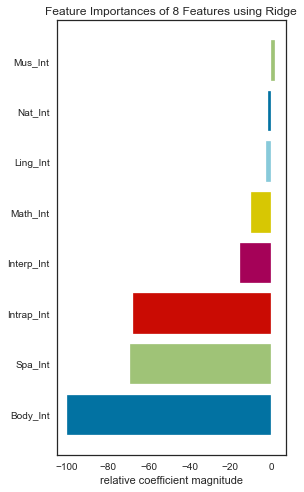

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [103]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rid_mod_cv, labels=pd.DataFrame(X_reg_train).columns)
visualizer = RadViz(size=(300, 500))
viz.fit(X_reg_train, y_reg_train)
viz.show()

## Lasso

### Lasso

In [104]:
from sklearn.linear_model import LassoCV
alpha_space = np.linspace(0,1,100)
las_cv_mod = LassoCV(alphas=alpha_space, cv = 10, max_iter=10000, n_jobs=-1)
las_cv_mod.fit(X_reg_train, y_reg_train)
las_cv_mod.alpha_

1.0

In [105]:
# las_mod for X_reg (Not scaled)
from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = las_mod.predict(X_reg_test)
y_reg_train_prd = las_mod.predict(X_reg_train)

In [106]:
las_mod_scores = {"lsm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                              "R2" : r2_score(y_reg_train, y_reg_train_prd),
                              "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                              "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "lsm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                              "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                              "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                              "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

las_mod_scrs =pd.DataFrame(las_mod_scores)
las_mod_scrs

,lsm_trn,lsm_tst
rmse,11.889079,12.297299
R2,0.019359,-0.109500
mae,10.207016,11.102959
mse,141.350203,151.223561


In [107]:
# las_model for MinMaxScaler

from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = las_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = las_mod.predict(X_reg_train_min_scl)

In [108]:
las_mod_scores = {"lsm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "lsm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

las_mod_min_scl_scrs =pd.DataFrame(las_mod_scores)
las_mod_min_scl_scrs

,lsm_mms_trn,lsm_mms_tst
rmse,12.005857,12.265839
R2,0.000000,-0.103830
mae,10.360816,11.000952
mse,144.140612,150.450816


In [109]:
# las_model for StandardScaler

from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = las_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = las_mod.predict(X_reg_train_std_scl)

In [110]:
las_mod_scores = {"lsm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "lsm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

las_mod_std_scl_scrs =pd.DataFrame(las_mod_scores)
las_mod_std_scl_scrs

,lsm_ss_trn,lsm_ss_tst
rmse,11.993267,12.295498
R2,0.002096,-0.109175
mae,10.350003,11.026049
mse,143.838442,151.179275


In [111]:
las_mod_scrs = pd.concat([las_mod_scrs, las_mod_min_scl_scrs, las_mod_std_scl_scrs], axis=1)
las_mod_scrs

,lsm_trn,lsm_tst,lsm_mms_trn,lsm_mms_tst,lsm_ss_trn,lsm_ss_tst
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275


### Lasso & CV

In [112]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_cv = cross_validate(las_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.040731
test_r2                              -0.706249
test_neg_mean_absolute_error        -11.481504
test_neg_mean_squared_error        -173.954235
dtype: float64

In [113]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_mms_cv = cross_validate(las_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.131923
test_r2                              -0.519086
test_neg_mean_absolute_error        -10.580499
test_neg_mean_squared_error        -149.538977
dtype: float64

In [114]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_ss_cv = cross_validate(rid_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.500902
test_r2                              -0.807147
test_neg_mean_absolute_error        -11.856837
test_neg_mean_squared_error        -187.392816
dtype: float64

In [115]:
las_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
las_mod_cv_scrs.rename(columns={0:"lsm_cv_scr",
                                1:"lsm_cv_mms_scr",
                                2:"lsm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
las_mod_cv_scrs

,lsm_cv_scr,lsm_cv_mms_scr,lsm_cv_ss_scr
rmse,-13.040731,-12.131923,-13.500902
R2,-0.706249,-0.519086,-0.807147
mae,-11.481504,-10.580499,-11.856837
mse,-173.954235,-149.538977,-187.392816


In [116]:
las_mod_cum_scrs = pd.concat([las_mod_scrs, las_mod_cv_scrs], axis=1)
las_mod_cum_scrs.columns = ["lsm_trn","lsm_tst","lsm_cv_scr","lsm_mms_trn","lsm_mms_tst","lsm_cv_mms_scr","lsm_ss_trn","lsm_ss_tst","lsm_cv_ss_scr"]
las_mod_cum_scrs

,lsm_trn,lsm_tst,lsm_cv_scr,lsm_mms_trn,lsm_mms_tst,lsm_cv_mms_scr,lsm_ss_trn,lsm_ss_tst,lsm_cv_ss_scr
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498,-13.040731,-12.131923,-13.500902
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175,-0.706249,-0.519086,-0.807147
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049,-11.481504,-10.580499,-11.856837
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275,-173.954235,-149.538977,-187.392816


### Lasso & Feature Importance

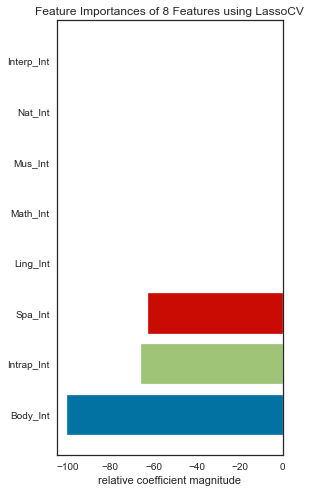

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [117]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(las_cv_mod, labels=pd.DataFrame(X_reg_train).columns)
visualizer = RadViz(size=(300, 500))
viz.fit(X_reg_train, y_reg_train)
viz.show()

## ElasticNet

### ElasticNet & GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
els_mod_grd = ElasticNet()
param_grid = {"alpha":[0.2, 0.3, 0.5, 0.8, 1.0], "l1_ratio":[0.5, 0.8, 1.0]}
grid_model = GridSearchCV(estimator=els_mod_grd,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs=-1,
                          scoring="neg_root_mean_squared_error")
grid_model.fit(X_reg_train, y_reg_train)
grid_model.best_estimator_

ElasticNet(l1_ratio=1.0)

In [119]:
# els_mod for X_reg (Not scaled)
from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = els_mod.predict(X_reg_test)
y_reg_train_prd = els_mod.predict(X_reg_train)

In [120]:
els_mod_scores = {"elsm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "elsm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

els_mod_scrs =pd.DataFrame(els_mod_scores)
els_mod_scrs

,elsm_trn,elsm_tst
rmse,11.889079,12.297299
R2,0.019359,-0.109500
mae,10.207016,11.102959
mse,141.350203,151.223561


In [121]:
# els_model for MinMaxScaler

from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = els_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = els_mod.predict(X_reg_train_min_scl)

In [122]:
els_mod_scores = {"elsm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "elsm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

els_mod_min_scl_scrs =pd.DataFrame(els_mod_scores)
els_mod_min_scl_scrs

,elsm_mms_trn,elsm_mms_tst
rmse,12.005857,12.265839
R2,0.000000,-0.103830
mae,10.360816,11.000952
mse,144.140612,150.450816


In [123]:
# els_model for StandardScaler

from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = els_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = els_mod.predict(X_reg_train_std_scl)

In [124]:
els_mod_scores = {"elsm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "elsm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

els_mod_std_scl_scrs =pd.DataFrame(els_mod_scores)
els_mod_std_scl_scrs

,elsm_ss_trn,elsm_ss_tst
rmse,11.993267,12.295498
R2,0.002096,-0.109175
mae,10.350003,11.026049
mse,143.838442,151.179275


In [125]:
els_mod_scrs = pd.concat([els_mod_scrs, els_mod_min_scl_scrs, els_mod_std_scl_scrs], axis=1)
els_mod_scrs

,elsm_trn,elsm_tst,elsm_mms_trn,elsm_mms_tst,elsm_ss_trn,elsm_ss_tst
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275


### ElasticNet & CV

In [126]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_cv = cross_validate(els_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.040731
test_r2                              -0.706249
test_neg_mean_absolute_error        -11.481504
test_neg_mean_squared_error        -173.954235
dtype: float64

In [127]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_mms_cv = cross_validate(els_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.131923
test_r2                              -0.519086
test_neg_mean_absolute_error        -10.580499
test_neg_mean_squared_error        -149.538977
dtype: float64

In [128]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_ss_cv = cross_validate(els_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.388180
test_r2                              -0.572926
test_neg_mean_absolute_error        -10.838855
test_neg_mean_squared_error        -156.118854
dtype: float64

In [129]:
els_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
els_mod_cv_scrs.rename(columns={0:"elsm_cv_scr",
                                1:"elsm_cv_mms_scr",
                                2:"elsm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
els_mod_cv_scrs

,elsm_cv_scr,elsm_cv_mms_scr,elsm_cv_ss_scr
rmse,-13.040731,-12.131923,-12.388180
R2,-0.706249,-0.519086,-0.572926
mae,-11.481504,-10.580499,-10.838855
mse,-173.954235,-149.538977,-156.118854


In [130]:
els_mod_cum_scrs = pd.concat([els_mod_scrs, els_mod_cv_scrs], axis=1)
els_mod_cum_scrs.columns = ["elsm_trn","elsm_tst","elsm_cv_scr","elsm_mms_trn","elsm_mms_tst","elsm_cv_mms_scr","elsm_ss_trn","elsm_ss_tst","elsm_cv_ss_scr"]
els_mod_cum_scrs

,elsm_trn,elsm_tst,elsm_cv_scr,elsm_mms_trn,elsm_mms_tst,elsm_cv_mms_scr,elsm_ss_trn,elsm_ss_tst,elsm_cv_ss_scr
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498,-13.040731,-12.131923,-12.388180
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175,-0.706249,-0.519086,-0.572926
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049,-11.481504,-10.580499,-10.838855
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275,-173.954235,-149.538977,-156.118854


## KNN

### KNNR Best "k" & Error

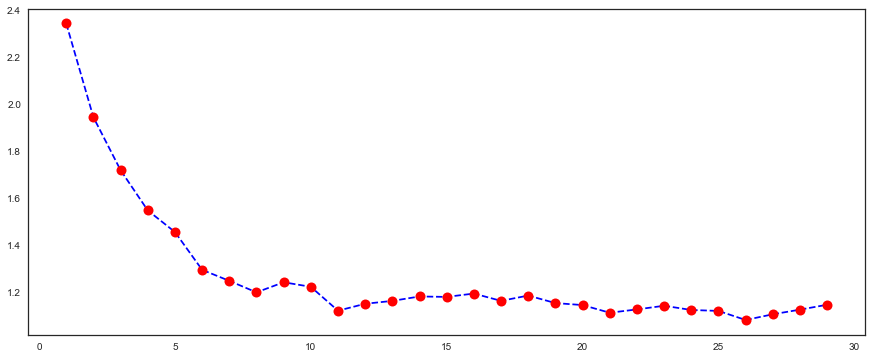

In [131]:
# Best "k" With NoScale Data
# Best "k" = 8  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train, y_reg_train)    
    pred = knn_model.predict(X_reg_test)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

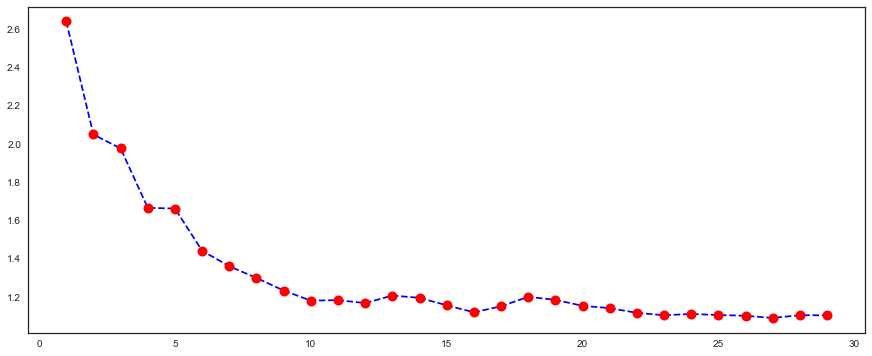

In [132]:
# Best "k" With MinMaxScale Data
# Best "k" = 4  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train_min_scl, y_reg_train)    
    pred = knn_model.predict(X_reg_test_min_scl)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

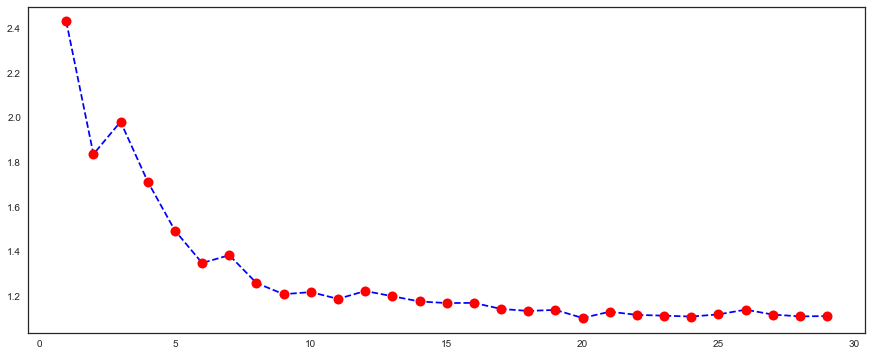

In [133]:
# Best "k" With MinMaxScale Data
# Best "k" = 6  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train_std_scl, y_reg_train)    
    pred = knn_model.predict(X_reg_test_std_scl)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

### KNNR Best "k" & GridSearchCV

In [134]:
# Best "k" With NoScale Data
# Best Params = {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [135]:
# Best "k" With MinMaxScale Data
# Best Params = {'n_neighbors': 24, 'p': 1, 'weights': 'uniform'} 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train_min_scl, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

In [136]:
# Best "k" With StandadScale Data
# Best Params = {'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train_std_scl, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

### KNNR

In [137]:
# knnr_mod for X_reg (Not scaled)
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = knnr_mod.predict(X_reg_test)
y_reg_train_prd = knnr_mod.predict(X_reg_train)

In [138]:
knnr_mod_scores = {"knnrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "knnrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

knnr_mod_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_scrs

,knnrm_trn,knnrm_tst
rmse,10.682429,14.512997
R2,0.208313,-0.545332
mae,9.085714,12.441667
mse,114.114286,210.627083


In [139]:
# knnr_model for MinMaxScaler
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = knnr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = knnr_mod.predict(X_reg_train_min_scl)

In [140]:
knnr_mod_scores = {"knnrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "knnrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

knnr_mod_min_scl_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_min_scl_scrs

,knnrm_mms_trn,knnrm_mms_tst
rmse,10.415819,15.058635
R2,0.247337,-0.663715
mae,8.735714,12.450000
mse,108.489286,226.762500


In [141]:
# knnr_model for StandardScaler
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = knnr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = knnr_mod.predict(X_reg_train_std_scl)

In [142]:
knnr_mod_scores = {"knnrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "knnrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

knnr_mod_std_scl_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_std_scl_scrs

,knnrm_ss_trn,knnrm_ss_tst
rmse,10.470494,15.271706
R2,0.239415,-0.711129
mae,8.817857,13.183333
mse,109.631250,233.225000


In [143]:
knnr_mod_scrs = pd.concat([knnr_mod_scrs, knnr_mod_min_scl_scrs, knnr_mod_std_scl_scrs], axis=1)
knnr_mod_scrs

,knnrm_trn,knnrm_tst,knnrm_mms_trn,knnrm_mms_tst,knnrm_ss_trn,knnrm_ss_tst
rmse,10.682429,14.512997,10.415819,15.058635,10.470494,15.271706
R2,0.208313,-0.545332,0.247337,-0.663715,0.239415,-0.711129
mae,9.085714,12.441667,8.735714,12.450000,8.817857,13.183333
mse,114.114286,210.627083,108.489286,226.762500,109.631250,233.225000


### KNNR & CV

In [144]:
# knnr_mod & CV for X_reg (Not scaled)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_cv = cross_validate(knnr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.784720
test_r2                              -0.598503
test_neg_mean_absolute_error        -10.996429
test_neg_mean_squared_error        -167.338393
dtype: float64

In [145]:
# knnr_model & CV for MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_mms_cv = cross_validate(knnr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.887438
test_r2                              -0.610492
test_neg_mean_absolute_error        -11.200000
test_neg_mean_squared_error        -168.746429
dtype: float64

In [146]:
# knnr_model & CV for StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_ss_cv = cross_validate(knnr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.022381
test_r2                              -0.649648
test_neg_mean_absolute_error        -11.246429
test_neg_mean_squared_error        -172.829464
dtype: float64

In [147]:
knnr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
knnr_mod_cv_scrs.rename(columns={0:"knnr_cv_scr",
                                 1:"knnr_cv_mms_scr",
                                 2:"knnr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
knnr_mod_cv_scrs

,knnr_cv_scr,knnr_cv_mms_scr,knnr_cv_ss_scr
rmse,-12.784720,-12.887438,-13.022381
R2,-0.598503,-0.610492,-0.649648
mae,-10.996429,-11.200000,-11.246429
mse,-167.338393,-168.746429,-172.829464


In [148]:
knnr_mod_cum_scrs = pd.concat([knnr_mod_scrs, knnr_mod_cv_scrs], axis=1)
knnr_mod_cum_scrs.columns = ["knnrm_trn","knnrm_tst","knnr_cv_scr","knnrm_mms_trn","knnrm_mms_tst","knnr_cv_mms_scr","knnrm_ss_trn","knnrm_ss_tst","knnr_cv_ss_scr"]
knnr_mod_cum_scrs			

,knnrm_trn,knnrm_tst,knnr_cv_scr,knnrm_mms_trn,knnrm_mms_tst,knnr_cv_mms_scr,knnrm_ss_trn,knnrm_ss_tst,knnr_cv_ss_scr
rmse,10.682429,14.512997,10.415819,15.058635,10.470494,15.271706,-12.784720,-12.887438,-13.022381
R2,0.208313,-0.545332,0.247337,-0.663715,0.239415,-0.711129,-0.598503,-0.610492,-0.649648
mae,9.085714,12.441667,8.735714,12.450000,8.817857,13.183333,-10.996429,-11.200000,-11.246429
mse,114.114286,210.627083,108.489286,226.762500,109.631250,233.225000,-167.338393,-168.746429,-172.829464


## SVM

### SVR & GridSearch

In [149]:
# Best Params With NoScale Data
# Best Params = {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.554 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.001 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.078 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.095 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.414 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}

In [150]:
# svr_mod for X_reg (Not scaled)
# {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}

from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.1, kernel="rbf")
svr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = svr_mod.predict(X_reg_test)
y_reg_train_prd = svr_mod.predict(X_reg_train)

In [151]:
svrr_mod_scores = {"svrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "svrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

svr_mod_scrs =pd.DataFrame(svrr_mod_scores)
svr_mod_scrs

,svrm_trn,svrm_tst
rmse,12.005804,12.257124
R2,0.000009,-0.102262
mae,10.359902,10.993347
mse,144.139339,150.237083


In [152]:
# Best Params With MinMaxScale Data
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.412 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

In [153]:
# svr_model for MinMaxScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
svr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = svr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = svr_mod.predict(X_reg_train_min_scl)

In [154]:
svrr_mod_scores = {"svrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "svrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

svr_mod_min_scl_scrs =pd.DataFrame(svrr_mod_scores)
svr_mod_min_scl_scrs

,svrm_mms_trn,svrm_mms_tst
rmse,12.005891,12.257107
R2,-0.000006,-0.102259
mae,10.360000,10.993333
mse,144.141429,150.236667


In [155]:
# Best Params With StandardScaler Data
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.413 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

In [156]:
# svr_model for StandardScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
svr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = svr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = svr_mod.predict(X_reg_train_std_scl)

In [157]:
svr_mod_scores = {"svrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "svrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

svr_mod_std_scl_scrs =pd.DataFrame(svr_mod_scores)
svr_mod_std_scl_scrs

,svrm_ss_trn,svrm_ss_tst
rmse,12.005891,12.257107
R2,-0.000006,-0.102259
mae,10.360000,10.993333
mse,144.141428,150.236665


In [158]:
svr_mod_scrs = pd.concat([svr_mod_scrs, svr_mod_min_scl_scrs, svr_mod_std_scl_scrs], axis=1)
svr_mod_scrs

,svrm_trn,svrm_tst,svrm_mms_trn,svrm_mms_tst,svrm_ss_trn,svrm_ss_tst
rmse,12.005804,12.257124,12.005891,12.257107,12.005891,12.257107
R2,0.000009,-0.102262,-0.000006,-0.102259,-0.000006,-0.102259
mae,10.359902,10.993347,10.360000,10.993333,10.360000,10.993333
mse,144.139339,150.237083,144.141429,150.236667,144.141428,150.236665


### SVR & CV

In [159]:
# svr_mod & CV for X_reg (Not scaled)
# Best Params = {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.1, kernel="rbf")
scores_cv = cross_validate(svr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.291910
test_r2                              -0.640887
test_neg_mean_absolute_error        -10.891421
test_neg_mean_squared_error        -153.644045
dtype: float64

In [160]:
# svr_mod & CV for X_reg MinMaxScaler
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
scores_mms_cv = cross_validate(svr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.291918
test_r2                              -0.640893
test_neg_mean_absolute_error        -10.891429
test_neg_mean_squared_error        -153.644286
dtype: float64

In [161]:
# svr_model & CV for StandardScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
scores_ss_cv = cross_validate(svr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.291918
test_r2                              -0.640893
test_neg_mean_absolute_error        -10.891429
test_neg_mean_squared_error        -153.644288
dtype: float64

In [162]:
svr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
svr_mod_cv_scrs.rename(columns={0:"svr_cv_scr",
                                1:"svr_cv_mms_scr",
                                2:"svr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
svr_mod_cv_scrs

,svr_cv_scr,svr_cv_mms_scr,svr_cv_ss_scr
rmse,-12.291910,-12.291918,-12.291918
R2,-0.640887,-0.640893,-0.640893
mae,-10.891421,-10.891429,-10.891429
mse,-153.644045,-153.644286,-153.644288


In [163]:
svr_mod_cum_scrs = pd.concat([svr_mod_scrs, svr_mod_cv_scrs], axis=1)
svr_mod_cum_scrs.columns = ["svrm_trn","svrm_tst","svr_cv_scr","svrm_mms_trn","svrm_mms_tst","svr_cv_mms_scr","svrm_ss_trn","svrm_ss_tst","svr_cv_ss_scr"]
svr_mod_cum_scrs			

,svrm_trn,svrm_tst,svr_cv_scr,svrm_mms_trn,svrm_mms_tst,svr_cv_mms_scr,svrm_ss_trn,svrm_ss_tst,svr_cv_ss_scr
rmse,12.005804,12.257124,12.005891,12.257107,12.005891,12.257107,-12.291910,-12.291918,-12.291918
R2,0.000009,-0.102262,-0.000006,-0.102259,-0.000006,-0.102259,-0.640887,-0.640893,-0.640893
mae,10.359902,10.993347,10.360000,10.993333,10.360000,10.993333,-10.891421,-10.891429,-10.891429
mse,144.139339,150.237083,144.141429,150.236667,144.141428,150.236665,-153.644045,-153.644286,-153.644288


## Decision Tree

### DTR & GridSearchCV

In [164]:
# Best Params With NoScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [165]:
# dtr_mod for X_reg (Not scaled)

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = dtr_mod.predict(X_reg_test)
y_reg_train_prd = dtr_mod.predict(X_reg_train)

In [166]:
dtr_mod_scores = {"dtrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "dtrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

dtr_mod_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_scrs

,dtrm_trn,dtrm_tst
rmse,11.709748,12.023570
R2,0.048719,-0.060656
mae,10.085714,10.875397
mse,137.118197,144.566237


In [167]:
# Best Params With MinMaxScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [168]:
# dtr_model for MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = dtr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = dtr_mod.predict(X_reg_train_min_scl)

In [169]:
dtr_mod_scores = {"dtrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "dtrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

dtr_mod_min_scl_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_min_scl_scrs

,dtrm_mms_trn,dtrm_mms_tst
rmse,11.866084,12.354972
R2,0.023149,-0.119931
mae,10.156693,11.038644
mse,140.803958,152.645327


In [170]:
# Best Params With StandadScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [171]:
# dtr_model for StandadScale

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = dtr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = dtr_mod.predict(X_reg_train_std_scl)

In [172]:
dtr_mod_scores = {"dtrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "dtrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

dtr_mod_std_scl_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_std_scl_scrs

,dtrm_ss_trn,dtrm_ss_tst
rmse,11.760065,12.907967
R2,0.040526,-0.222428
mae,10.135349,11.362476
mse,138.299131,166.615617


In [173]:
dtr_mod_scrs = pd.concat([dtr_mod_scrs, dtr_mod_min_scl_scrs, dtr_mod_std_scl_scrs], axis=1)
dtr_mod_scrs

,dtrm_trn,dtrm_tst,dtrm_mms_trn,dtrm_mms_tst,dtrm_ss_trn,dtrm_ss_tst
rmse,11.709748,12.023570,11.866084,12.354972,11.760065,12.907967
R2,0.048719,-0.060656,0.023149,-0.119931,0.040526,-0.222428
mae,10.085714,10.875397,10.156693,11.038644,10.135349,11.362476
mse,137.118197,144.566237,140.803958,152.645327,138.299131,166.615617


### DTR & CV

In [174]:
# dtr_mod & CV for X_reg (Not scaled)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_cv = cross_validate(dtr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.005276
test_r2                              -0.682272
test_neg_mean_absolute_error        -11.347175
test_neg_mean_squared_error        -173.876567
dtype: float64

In [175]:
# svr_mod & CV for X_reg MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_mms_cv = cross_validate(dtr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.631261
test_r2                              -0.666852
test_neg_mean_absolute_error        -10.717926
test_neg_mean_squared_error        -164.095154
dtype: float64

In [176]:
# svr_model & CV for StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_ss_cv = cross_validate(dtr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.914116
test_r2                              -0.731697
test_neg_mean_absolute_error        -11.326253
test_neg_mean_squared_error        -173.714762
dtype: float64

In [177]:
dtr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
dtr_mod_cv_scrs.rename(columns={0:"dtr_cv_scr",
                                1:"dtr_cv_mms_scr",
                                2:"dtr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
dtr_mod_cv_scrs

,dtr_cv_scr,dtr_cv_mms_scr,dtr_cv_ss_scr
rmse,-13.005276,-12.631261,-12.914116
R2,-0.682272,-0.666852,-0.731697
mae,-11.347175,-10.717926,-11.326253
mse,-173.876567,-164.095154,-173.714762


In [178]:
dtr_mod_cum_scrs = pd.concat([dtr_mod_scrs, dtr_mod_cv_scrs], axis=1)
dtr_mod_cum_scrs.columns = ["dtrm_trn","dtrm_tst","dtr_cv_scr","dtrm_mms_trn","dtrm_mms_tst","dtr_cv_mms_scr","dtrm_ss_trn","dtrm_ss_tst","dtr_cv_ss_scr"]
dtr_mod_cum_scrs			

,dtrm_trn,dtrm_tst,dtr_cv_scr,dtrm_mms_trn,dtrm_mms_tst,dtr_cv_mms_scr,dtrm_ss_trn,dtrm_ss_tst,dtr_cv_ss_scr
rmse,11.709748,12.023570,11.866084,12.354972,11.760065,12.907967,-13.005276,-12.631261,-12.914116
R2,0.048719,-0.060656,0.023149,-0.119931,0.040526,-0.222428,-0.682272,-0.666852,-0.731697
mae,10.085714,10.875397,10.156693,11.038644,10.135349,11.362476,-11.347175,-10.717926,-11.326253
mse,137.118197,144.566237,140.803958,152.645327,138.299131,166.615617,-173.876567,-164.095154,-173.714762


### DTR & Feature Importance

,Feat_Imp
Ling_Int,0.000000
Math_Int,0.000000
Spa_Int,0.000000
Mus_Int,0.000000
Interp_Int,0.000000
Intrap_Int,0.000000
Nat_Int,0.215116
Body_Int,0.784884


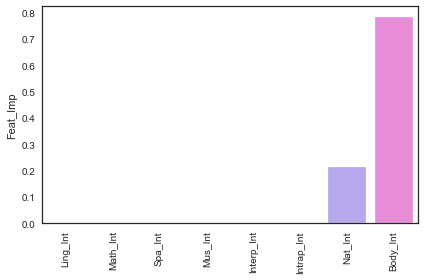

In [179]:
# dtr_model No Scale Data (The same with Scaled data)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2,
                              max_features="log2",
                              min_samples_leaf=2,
                              min_samples_split=2,
                              splitter="random",
                              random_state=42)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

### DTR & Visualize Tree

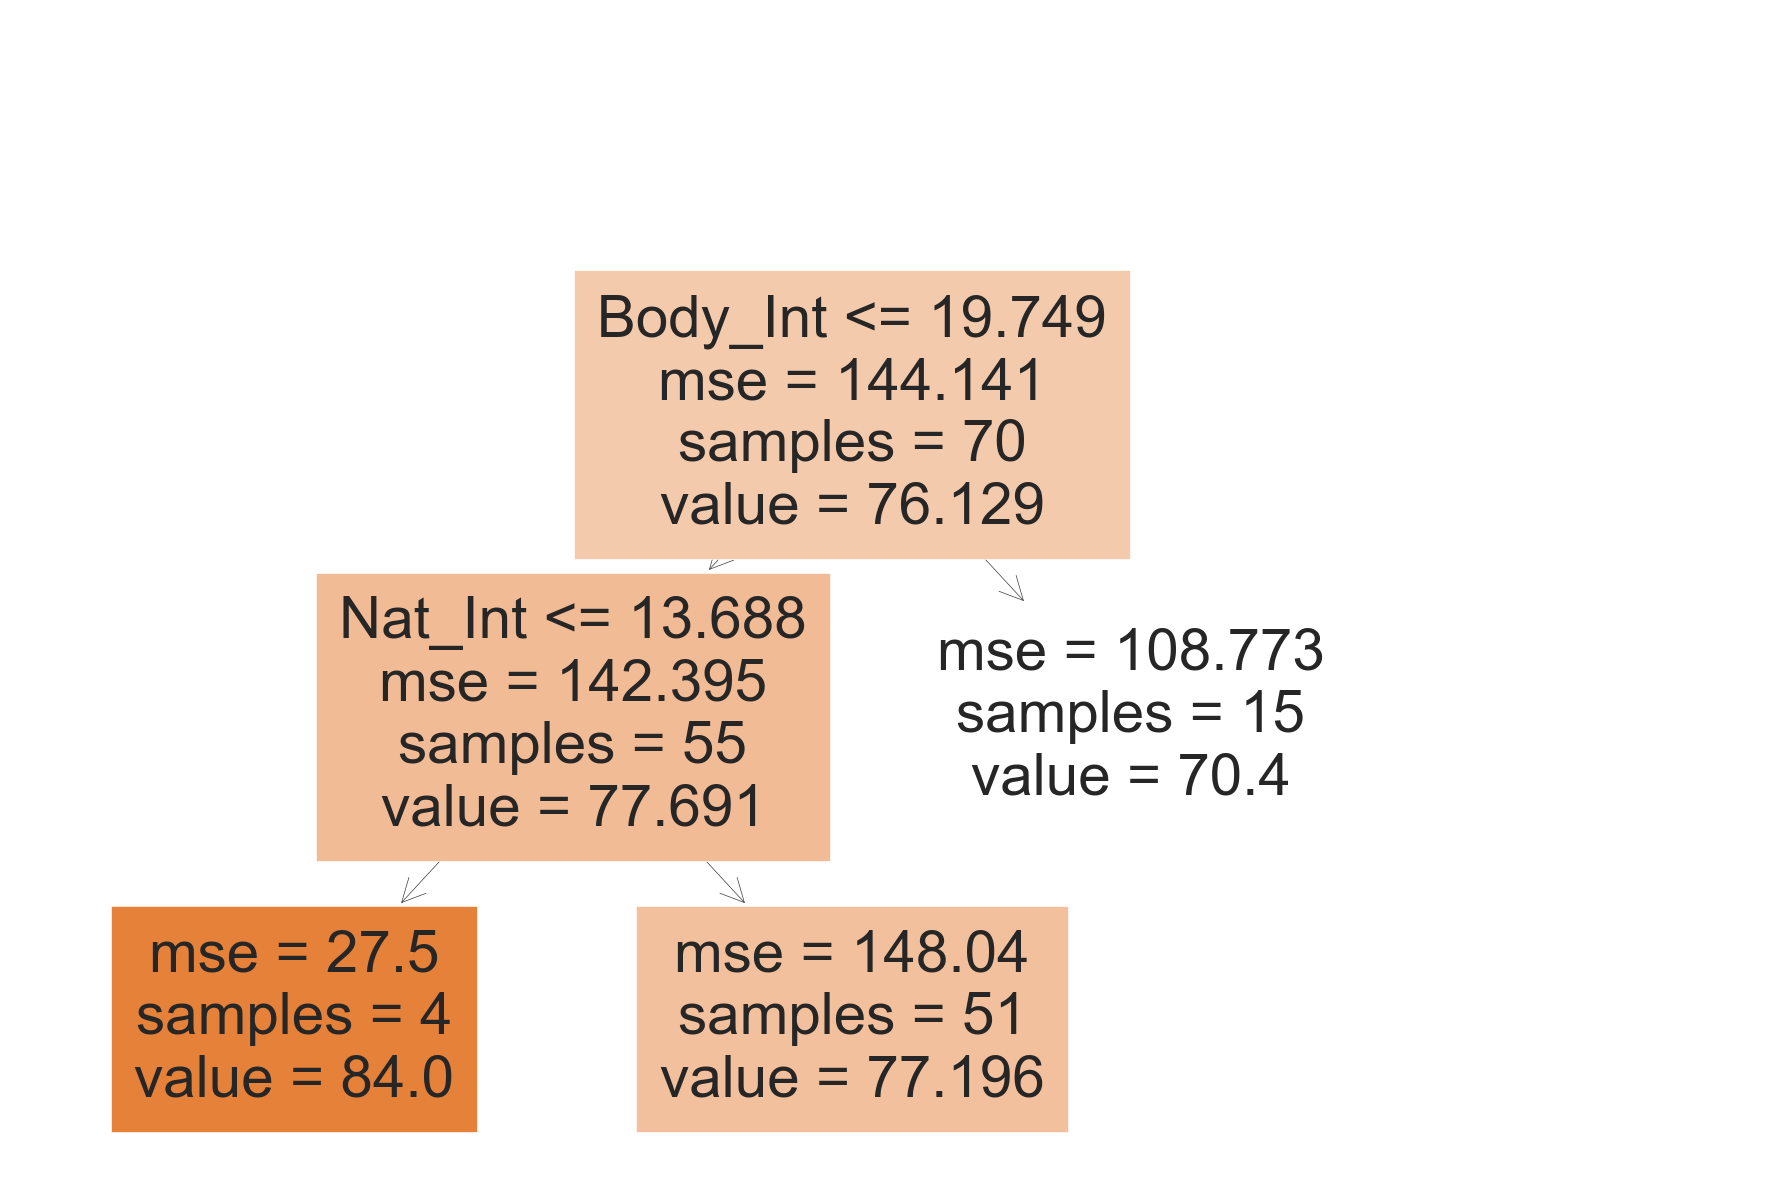

In [180]:
# dtr_model No Scale Data (The same with Scaled data)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

model = DecisionTreeRegressor(max_depth=2,
                              max_features="log2",
                              min_samples_leaf=2,
                              min_samples_split=2,
                              splitter="random",
                              random_state=42)
model.fit(X_reg_train, y_reg_train)
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,
          filled=True,
          feature_names=X_reg.columns)
plt.tight_layout();

## Random Forest

### RFR & Best Number of Trees

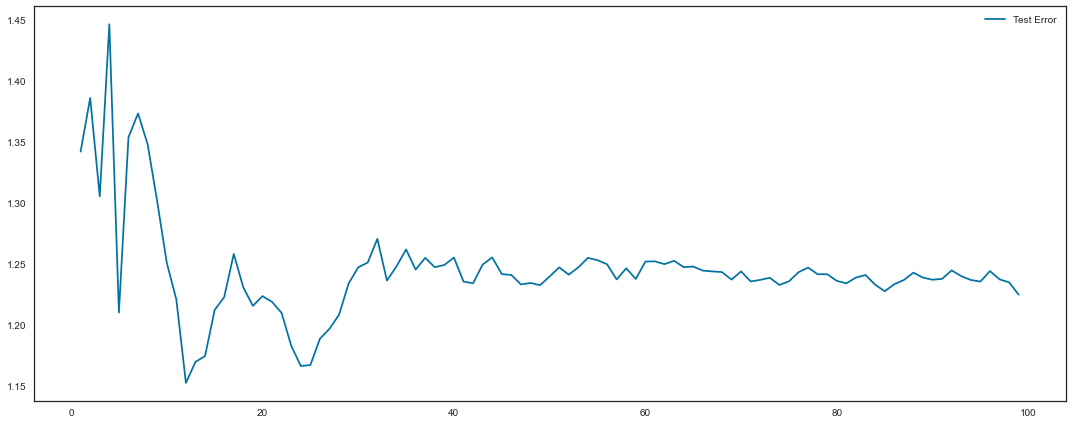

In [181]:
# rfr_model & No Scale Data (The same with the scaled data)
# Best Tree = 12
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

test_error = []
for n in range(1,100):
    model = RandomForestRegressor(n_estimators=n, max_features='auto', random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### RFR & GridSearchCV

In [182]:
# Best Params With NoScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [183]:
# rfr_mod for X_reg (Not scaled)

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = rfr_mod.predict(X_reg_test)
y_reg_train_prd = rfr_mod.predict(X_reg_train)

In [184]:
rfr_mod_scores = {"rfrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "rfrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

rfr_mod_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_scrs

,rfrm_trn,rfrm_tst
rmse,8.310864,12.935901
R2,0.520812,-0.227725
mae,7.132424,11.271160
mse,69.070462,167.337527


In [185]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [186]:
# rfr_model for MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = rfr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = rfr_mod.predict(X_reg_train_min_scl)

In [187]:
rfr_mod_scores = {"rfrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "rfrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

rfr_mod_min_scl_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_min_scl_scrs

,rfrm_mms_trn,rfrm_mms_tst
rmse,8.144834,12.910220
R2,0.539767,-0.222855
mae,6.623484,11.326930
mse,66.338320,166.673784


In [188]:
# Best Params With StandadScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [189]:
# rfr_model for StandadScale

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = rfr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = rfr_mod.predict(X_reg_train_std_scl)

In [190]:
rfr_mod_scores = {"rfrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "rfrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

rfr_mod_std_scl_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_std_scl_scrs

,rfrm_ss_trn,rfrm_ss_tst
rmse,7.917148,12.340183
R2,0.565138,-0.117251
mae,6.580417,10.788313
mse,62.681227,152.280114


In [191]:
rfr_mod_scrs = pd.concat([rfr_mod_scrs, rfr_mod_min_scl_scrs, rfr_mod_std_scl_scrs], axis=1)
rfr_mod_scrs

,rfrm_trn,rfrm_tst,rfrm_mms_trn,rfrm_mms_tst,rfrm_ss_trn,rfrm_ss_tst
rmse,8.310864,12.935901,8.144834,12.910220,7.917148,12.340183
R2,0.520812,-0.227725,0.539767,-0.222855,0.565138,-0.117251
mae,7.132424,11.271160,6.623484,11.326930,6.580417,10.788313
mse,69.070462,167.337527,66.338320,166.673784,62.681227,152.280114


### RFR & CV

In [192]:
# rfr_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_cv = cross_validate(rfr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.846820
test_r2                              -0.632795
test_neg_mean_absolute_error        -11.204269
test_neg_mean_squared_error        -169.416201
dtype: float64

In [193]:
# rfr_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_mms_cv = cross_validate(rfr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.631968
test_r2                              -0.573607
test_neg_mean_absolute_error        -10.800515
test_neg_mean_squared_error        -164.696615
dtype: float64

In [194]:
# rfr_model & CV for StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_ss_cv = cross_validate(rfr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.654872
test_r2                              -0.703499
test_neg_mean_absolute_error        -10.915765
test_neg_mean_squared_error        -168.606380
dtype: float64

In [195]:
rfr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
rfr_mod_cv_scrs.rename(columns={0:"rfr_cv_scr",
                                1:"rfr_cv_mms_scr",
                                2:"rfr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
rfr_mod_cv_scrs

,rfr_cv_scr,rfr_cv_mms_scr,rfr_cv_ss_scr
rmse,-12.846820,-12.631968,-12.654872
R2,-0.632795,-0.573607,-0.703499
mae,-11.204269,-10.800515,-10.915765
mse,-169.416201,-164.696615,-168.606380


In [196]:
rfr_mod_cum_scrs = pd.concat([rfr_mod_scrs, rfr_mod_cv_scrs], axis=1)
rfr_mod_cum_scrs.columns = ["rfrm_trn","rfrm_tst","rfr_cv_scr","rfrm_mms_trn","rfrm_mms_tst","rfr_cv_mms_scr","rfrm_ss_trn","rfrm_ss_tst","rfr_cv_ss_scr"]
rfr_mod_cum_scrs			

,rfrm_trn,rfrm_tst,rfr_cv_scr,rfrm_mms_trn,rfrm_mms_tst,rfr_cv_mms_scr,rfrm_ss_trn,rfrm_ss_tst,rfr_cv_ss_scr
rmse,8.310864,12.935901,8.144834,12.910220,7.917148,12.340183,-12.846820,-12.631968,-12.654872
R2,0.520812,-0.227725,0.539767,-0.222855,0.565138,-0.117251,-0.632795,-0.573607,-0.703499
mae,7.132424,11.271160,6.623484,11.326930,6.580417,10.788313,-11.204269,-10.800515,-10.915765
mse,69.070462,167.337527,66.338320,166.673784,62.681227,152.280114,-169.416201,-164.696615,-168.606380


### RFR & Feature Importance

,Feat_Imp
Interp_Int,0.088443
Spa_Int,0.091833
Mus_Int,0.101015
Intrap_Int,0.103622
Ling_Int,0.121121
Body_Int,0.127778
Math_Int,0.181677
Nat_Int,0.184511


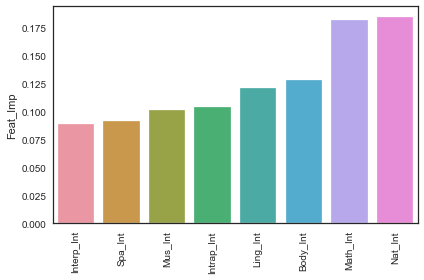

In [197]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=None,
                              max_features="log2",
                              min_samples_leaf=3,
                              min_samples_split=2,
                              n_estimators=15)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

### RFR & Visualize Tree

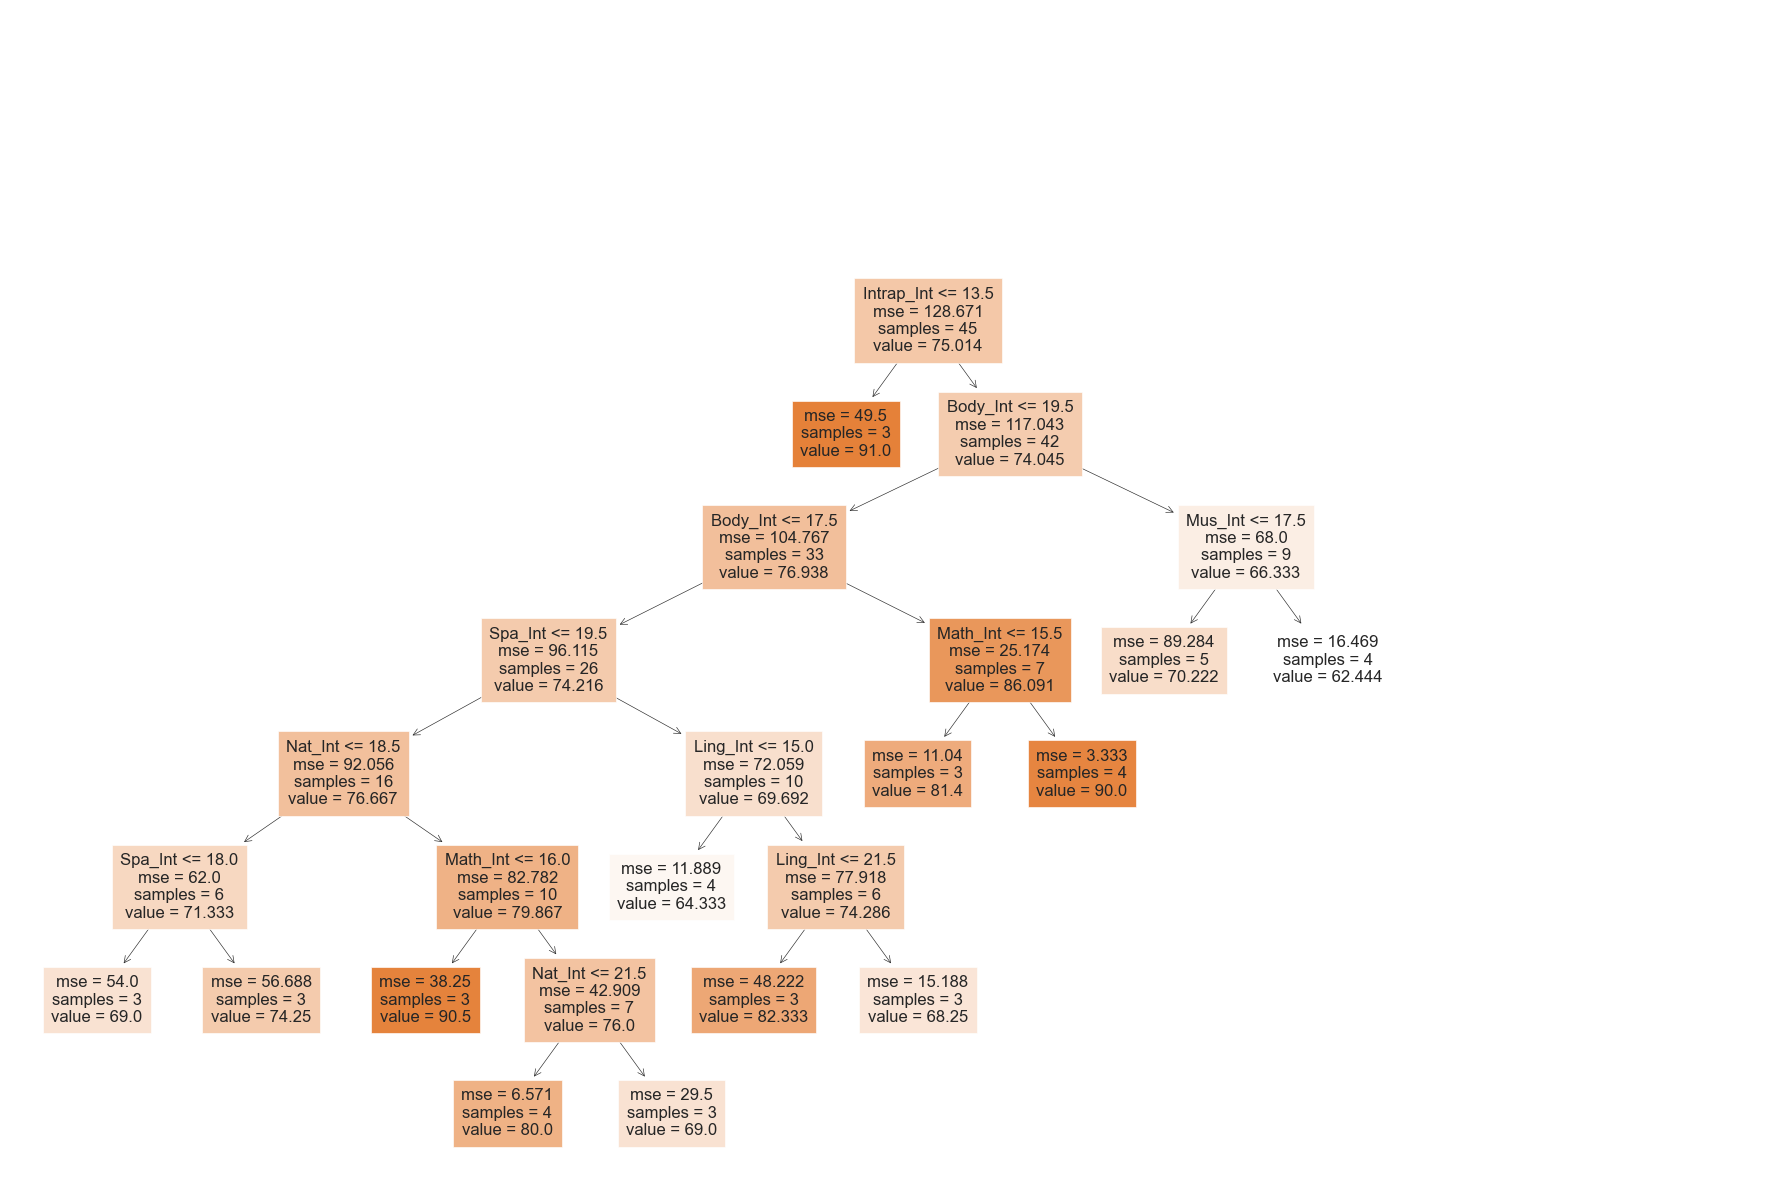

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
model = RandomForestRegressor(max_depth=None,
                              max_features="log2",
                              min_samples_leaf=3,
                              min_samples_split=2,
                              n_estimators=15)
model.fit(X_reg_train, y_reg_train)
plt.figure(figsize = (12,8), dpi = 150)
plot_tree(model.estimators_[0],
          filled = True,
          feature_names = X_reg.columns,
          fontsize = 8)
plt.tight_layout();

## AdaBoosting

### AdaBR & Best Number of "n_estimators"

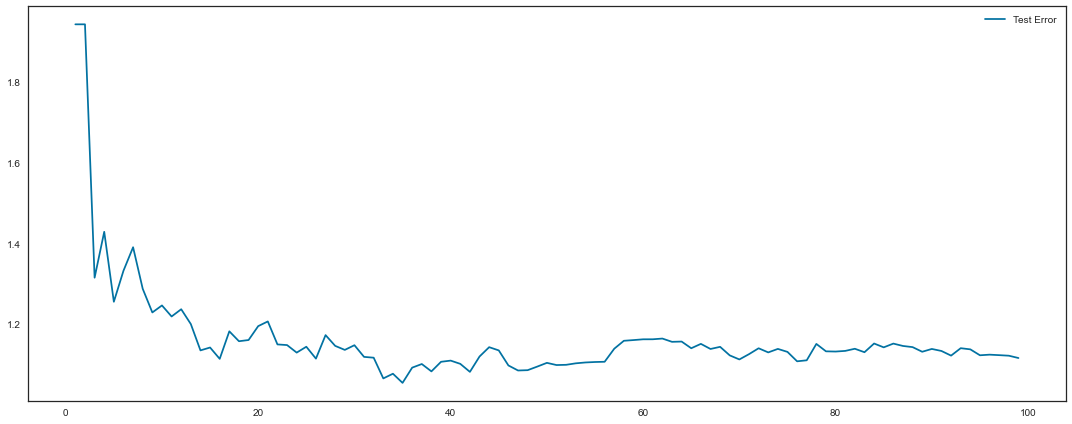

In [199]:
# Adar_model & No Scale Data 
# Best number of "n_estimators" = 18 (The same with the scaled data)
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
test_error = []

for n in range(1,100):
    model = AdaBoostRegressor(n_estimators=n, learning_rate=0.02, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### AdaBR & GridSearchCV

In [200]:
# Best Params With NoScale Data
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.02, 'n_estimators': 5}

In [201]:
# Adar_mod for X_reg (Not scaled)

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=5,
                             learning_rate=0.02)
Adar_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = Adar_mod.predict(X_reg_test)
y_reg_train_prd = Adar_mod.predict(X_reg_train)

In [202]:
Adar_mod_scores = {"Adarm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "Adarm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

Adar_mod_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_scrs

,Adarm_trn,Adarm_tst
rmse,9.285173,10.532479
R2,0.401873,0.186104
mae,7.332197,8.587732
mse,86.214440,110.933123


In [203]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [204]:
# Adar_model for MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=20,
                             learning_rate=0.1)
Adar_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = Adar_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = Adar_mod.predict(X_reg_train_min_scl)

In [205]:
Adar_mod_scores = {"Adarm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "Adarm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

Adar_mod_min_scl_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_min_scl_scrs

,Adarm_mms_trn,Adarm_mms_tst
rmse,8.742833,12.437076
R2,0.469704,-0.134865
mae,7.304430,10.868897
mse,76.437130,154.680850


In [206]:
# Best Params With StandadScale Data

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.03, 'n_estimators': 5}

In [207]:
# Adar_model for StandadScale

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=5,
                             learning_rate=0.03)
Adar_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = Adar_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = Adar_mod.predict(X_reg_train_std_scl)

In [208]:
Adar_mod_scores = {"Adarm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "Adarm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

Adar_mod_std_scl_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_std_scl_scrs

,Adarm_ss_trn,Adarm_ss_tst
rmse,10.355225,13.328813
R2,0.256069,-0.303439
mae,8.162371,11.710918
mse,107.230687,177.657256


In [209]:
Adar_mod_scrs = pd.concat([Adar_mod_scrs, Adar_mod_min_scl_scrs, Adar_mod_std_scl_scrs], axis=1)
Adar_mod_scrs

,Adarm_trn,Adarm_tst,Adarm_mms_trn,Adarm_mms_tst,Adarm_ss_trn,Adarm_ss_tst
rmse,9.285173,10.532479,8.742833,12.437076,10.355225,13.328813
R2,0.401873,0.186104,0.469704,-0.134865,0.256069,-0.303439
mae,7.332197,8.587732,7.304430,10.868897,8.162371,11.710918
mse,86.214440,110.933123,76.437130,154.680850,107.230687,177.657256


### AdaBR & CV

In [210]:
# Adar_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=5,
                                learning_rate=0.02)
scores_cv = cross_validate(Adar_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.782238
test_r2                              -0.931296
test_neg_mean_absolute_error        -11.517058
test_neg_mean_squared_error        -196.511499
dtype: float64

In [211]:
# Adar_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=20,
                                learning_rate=0.1)
scores_mms_cv = cross_validate(Adar_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.959762
test_r2                              -0.678815
test_neg_mean_absolute_error        -10.906585
test_neg_mean_squared_error        -174.844497
dtype: float64

In [212]:
# Adar_model & CV for StandardScaler

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=5,
                                learning_rate=0.03)
scores_ss_cv = cross_validate(Adar_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -14.954294
test_r2                              -1.212005
test_neg_mean_absolute_error        -13.012941
test_neg_mean_squared_error        -228.184539
dtype: float64

In [213]:
Adar_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
Adar_mod_cv_scrs.rename(columns={0:"Adar_cv_scr",
                                 1:"Adar_cv_mms_scr",
                                 2:"Adar_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
Adar_mod_cv_scrs

,Adar_cv_scr,Adar_cv_mms_scr,Adar_cv_ss_scr
rmse,-13.782238,-12.959762,-14.954294
R2,-0.931296,-0.678815,-1.212005
mae,-11.517058,-10.906585,-13.012941
mse,-196.511499,-174.844497,-228.184539


In [214]:
Adar_mod_cum_scrs = pd.concat([Adar_mod_scrs, Adar_mod_cv_scrs], axis=1)
Adar_mod_cum_scrs.columns = ["Adarm_trn","Adarm_tst","Adar_cv_scr","Adarm_mms_trn","Adarm_mms_tst","Adar_cv_mms_scr","Adarm_ss_trn","Adarm_ss_tst","Adar_cv_ss_scr"]
Adar_mod_cum_scrs			

,Adarm_trn,Adarm_tst,Adar_cv_scr,Adarm_mms_trn,Adarm_mms_tst,Adar_cv_mms_scr,Adarm_ss_trn,Adarm_ss_tst,Adar_cv_ss_scr
rmse,9.285173,10.532479,8.742833,12.437076,10.355225,13.328813,-13.782238,-12.959762,-14.954294
R2,0.401873,0.186104,0.469704,-0.134865,0.256069,-0.303439,-0.931296,-0.678815,-1.212005
mae,7.332197,8.587732,7.304430,10.868897,8.162371,11.710918,-11.517058,-10.906585,-13.012941
mse,86.214440,110.933123,76.437130,154.680850,107.230687,177.657256,-196.511499,-174.844497,-228.184539


### AdaBR & Feature Importance

,Feat_Imp
Interp_Int,0.002878
Mus_Int,0.012524
Spa_Int,0.052249
Intrap_Int,0.053729
Ling_Int,0.127291
Math_Int,0.150761
Body_Int,0.220110
Nat_Int,0.380458


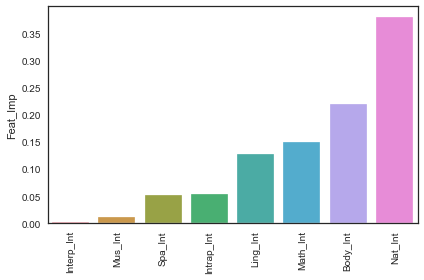

In [215]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=5, learning_rate=0.02, random_state=42)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## GradientBoosting

### GrdBR & Best Number of "n_estimators"

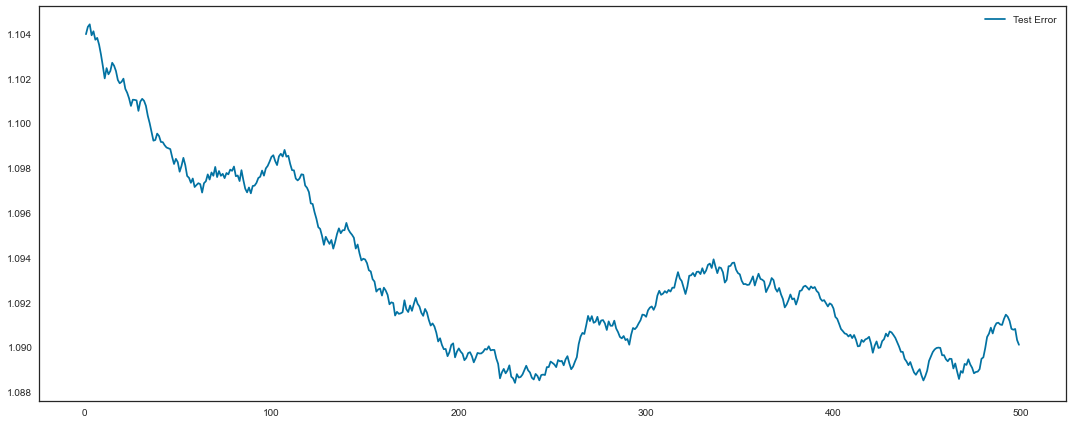

In [216]:
# Grdr_model & No Scale Data 
# Best number of "n_estimators" = 200 (The same with the scaled data)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
test_error = []

for n in range(1,500):
    model = GradientBoostingRegressor(n_estimators=n,
                                      max_depth=3,
                                      max_features=None,
                                      subsample=0.8,
                                      learning_rate=0.001,
                                      random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,500), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### GrdBR & GridSearchCV

In [217]:
# Best Params With NoScale Data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [218]:
# Grdr_mod for X_reg (Not scaled)

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = Grdr_mod.predict(X_reg_test)
y_reg_train_prd = Grdr_mod.predict(X_reg_train)

In [219]:
Grdr_mod_scores = {"Grdrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "Grdrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

Grdr_mod_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_scrs

,Grdrm_trn,Grdrm_tst
rmse,11.300893,12.204815
R2,0.113989,-0.092874
mae,9.723951,10.868404
mse,127.710173,148.957508


In [220]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [221]:
# Grdr_model for MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = Grdr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = Grdr_mod.predict(X_reg_train_min_scl)

In [222]:
Grdr_mod_scores = {"Grdrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "Grdrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

Grdr_mod_min_scl_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_min_scl_scrs

,Grdrm_mms_trn,Grdrm_mms_tst
rmse,11.305719,12.218866
R2,0.113232,-0.095392
mae,9.724936,10.893750
mse,127.819288,149.300689


In [223]:
# Best Params With StandadScale Data

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [224]:
# Grdr_model for StandadScale

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = Grdr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = Grdr_mod.predict(X_reg_train_std_scl)

In [225]:
Grdr_mod_scores = {"Grdrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "Grdrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

Grdr_mod_std_scl_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_std_scl_scrs

,Grdrm_ss_trn,Grdrm_ss_tst
rmse,11.329355,12.232081
R2,0.109520,-0.097762
mae,9.747990,10.897184
mse,128.354280,149.623807


In [226]:
Grdr_mod_scrs = pd.concat([Grdr_mod_scrs, Grdr_mod_min_scl_scrs, Grdr_mod_std_scl_scrs], axis=1)
Grdr_mod_scrs

,Grdrm_trn,Grdrm_tst,Grdrm_mms_trn,Grdrm_mms_tst,Grdrm_ss_trn,Grdrm_ss_tst
rmse,11.300893,12.204815,11.305719,12.218866,11.329355,12.232081
R2,0.113989,-0.092874,0.113232,-0.095392,0.109520,-0.097762
mae,9.723951,10.868404,9.724936,10.893750,9.747990,10.897184
mse,127.710173,148.957508,127.819288,149.300689,128.354280,149.623807


### GrdBR & CV

In [227]:
# Grdr_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_cv = cross_validate(Grdr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.163298
test_r2                              -0.507200
test_neg_mean_absolute_error        -10.594084
test_neg_mean_squared_error        -150.467650
dtype: float64

In [228]:
# Grdr_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_mms_cv = cross_validate(Grdr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.168436
test_r2                              -0.509287
test_neg_mean_absolute_error        -10.595464
test_neg_mean_squared_error        -150.660237
dtype: float64

In [229]:
# Grdr_model & CV for StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_ss_cv = cross_validate(Grdr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.183792
test_r2                              -0.513044
test_neg_mean_absolute_error        -10.606009
test_neg_mean_squared_error        -150.977081
dtype: float64

In [230]:
Grdr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
Grdr_mod_cv_scrs.rename(columns={0:"Grdr_cv_scr",
                                 1:"Grdr_cv_mms_scr",
                                 2:"Grdr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
Grdr_mod_cv_scrs

,Grdr_cv_scr,Grdr_cv_mms_scr,Grdr_cv_ss_scr
rmse,-12.163298,-12.168436,-12.183792
R2,-0.507200,-0.509287,-0.513044
mae,-10.594084,-10.595464,-10.606009
mse,-150.467650,-150.660237,-150.977081


In [231]:
Grdr_mod_cum_scrs = pd.concat([Grdr_mod_scrs, Grdr_mod_cv_scrs], axis=1)
Grdr_mod_cum_scrs.columns = ["Grdrm_trn","Grdrm_tst","Grdr_cv_scr","Grdrm_mms_trn","Grdrm_mms_tst","Grdr_cv_mms_scr","Grdrm_ss_trn","Grdrm_ss_tst","Grdr_cv_ss_scr"]
Grdr_mod_cum_scrs			

,Grdrm_trn,Grdrm_tst,Grdr_cv_scr,Grdrm_mms_trn,Grdrm_mms_tst,Grdr_cv_mms_scr,Grdrm_ss_trn,Grdrm_ss_tst,Grdr_cv_ss_scr
rmse,11.300893,12.204815,11.305719,12.218866,11.329355,12.232081,-12.163298,-12.168436,-12.183792
R2,0.113989,-0.092874,0.113232,-0.095392,0.109520,-0.097762,-0.507200,-0.509287,-0.513044
mae,9.723951,10.868404,9.724936,10.893750,9.747990,10.897184,-10.594084,-10.595464,-10.606009
mse,127.710173,148.957508,127.819288,149.300689,128.354280,149.623807,-150.467650,-150.660237,-150.977081


### GrdBR & Feature Importance

,Feat_Imp
Mus_Int,0.048857
Ling_Int,0.070449
Interp_Int,0.072135
Intrap_Int,0.096573
Spa_Int,0.124181
Body_Int,0.175211
Nat_Int,0.199282
Math_Int,0.213312


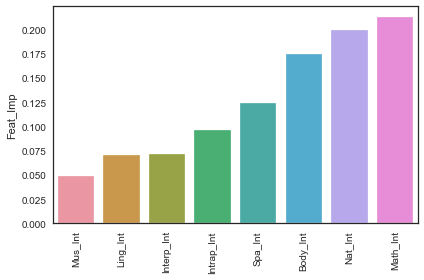

In [232]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(learning_rate=0.001,
                                  max_depth=3,
                                  max_features=None,
                                  n_estimators=200,
                                  subsample=0.8)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## XGB

### XGBR & Best Number of "n_estimators"

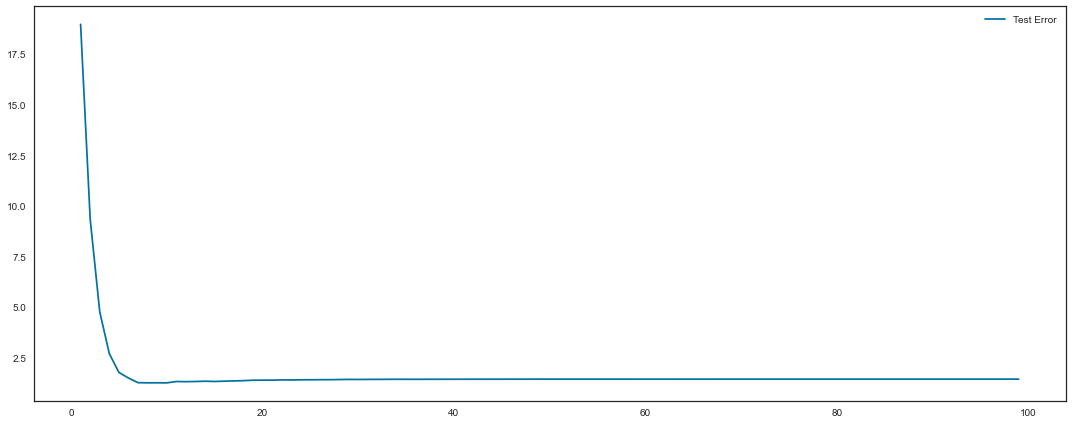

In [233]:
# xgbr_model & No Scale Data 
# Best number of "n_estimators" = 10 (The same with the scaled data)
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
test_error = []

for n in range(1,100):
    model = XGBRegressor(n_estimators=n, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### XGBR & GridSearchCV

In [234]:
# Best Params With NoScale Data
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [235]:
# xgbr_mod for X_reg (Not scaled)

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = xgbr_mod.predict(X_reg_test)
y_reg_train_prd = xgbr_mod.predict(X_reg_train)

In [236]:
xgbr_mod_scores = {"xgbrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "xgbrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

xgbr_mod_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_scrs

,xgbrm_trn,xgbrm_tst
rmse,9.102535,11.982605
R2,0.425171,-0.053441
mae,7.100905,10.301390
mse,82.856141,143.582819


In [237]:
# Best Params With MinMaxScale Data

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [238]:
# xgbr_model for MinMaxScaler

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = xgbr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = xgbr_mod.predict(X_reg_train_min_scl)

In [239]:
xgbr_mod_scores = {"xgbrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "xgbrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

xgbr_mod_min_scl_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_min_scl_scrs

,xgbrm_mms_trn,xgbrm_mms_tst
rmse,9.102535,11.982605
R2,0.425171,-0.053441
mae,7.100905,10.301390
mse,82.856141,143.582819


In [240]:
# Best Params With StandadScale Data

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [241]:
# xgbr_model for StandadScale

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = xgbr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = xgbr_mod.predict(X_reg_train_std_scl)

In [242]:
xgbr_mod_scores = {"xgbrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "xgbrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

xgbr_mod_std_scl_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_std_scl_scrs

,xgbrm_ss_trn,xgbrm_ss_tst
rmse,9.102535,11.980123
R2,0.425171,-0.053005
mae,7.100905,10.297643
mse,82.856141,143.523355


In [243]:
xgbr_mod_scrs = pd.concat([xgbr_mod_scrs, xgbr_mod_min_scl_scrs, xgbr_mod_std_scl_scrs], axis=1)
xgbr_mod_scrs

,xgbrm_trn,xgbrm_tst,xgbrm_mms_trn,xgbrm_mms_tst,xgbrm_ss_trn,xgbrm_ss_tst
rmse,9.102535,11.982605,9.102535,11.982605,9.102535,11.980123
R2,0.425171,-0.053441,0.425171,-0.053441,0.425171,-0.053005
mae,7.100905,10.301390,7.100905,10.301390,7.100905,10.297643
mse,82.856141,143.582819,82.856141,143.582819,82.856141,143.523355


### XGBBR & CV

In [244]:
# xgbr_mod & CV for X_reg (Not scaled)

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_cv = cross_validate(xgbr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.709483
test_r2                              -0.517648
test_neg_mean_absolute_error        -10.498595
test_neg_mean_squared_error        -168.264356
dtype: float64

In [245]:
# xgbr_mod & CV for X_reg MinMaxScaler

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_mms_cv = cross_validate(xgbr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.709483
test_r2                              -0.517648
test_neg_mean_absolute_error        -10.498595
test_neg_mean_squared_error        -168.264356
dtype: float64

In [246]:
# xgbr_model & CV for StandardScaler

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_ss_cv = cross_validate(xgbr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.692402
test_r2                              -0.513864
test_neg_mean_absolute_error        -10.466307
test_neg_mean_squared_error        -167.804989
dtype: float64

In [247]:
xgbr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
xgbr_mod_cv_scrs.rename(columns={0:"xgbr_cv_scr",
                                 1:"xgbr_cv_mms_scr",
                                 2:"xgbr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
xgbr_mod_cv_scrs

,xgbr_cv_scr,xgbr_cv_mms_scr,xgbr_cv_ss_scr
rmse,-12.709483,-12.709483,-12.692402
R2,-0.517648,-0.517648,-0.513864
mae,-10.498595,-10.498595,-10.466307
mse,-168.264356,-168.264356,-167.804989


In [248]:
xgbr_mod_cum_scrs = pd.concat([xgbr_mod_scrs, xgbr_mod_cv_scrs], axis=1)
xgbr_mod_cum_scrs.columns = ["xgbrm_trn","xgbrm_tst","xgbr_cv_scr","xgbrm_mms_trn","xgbrm_mms_tst","xgbr_cv_mms_scr","xgbrm_ss_trn","xgbrm_ss_tst","xgbr_cv_ss_scr"]
xgbr_mod_cum_scrs			

,xgbrm_trn,xgbrm_tst,xgbr_cv_scr,xgbrm_mms_trn,xgbrm_mms_tst,xgbr_cv_mms_scr,xgbrm_ss_trn,xgbrm_ss_tst,xgbr_cv_ss_scr
rmse,9.102535,11.982605,9.102535,11.982605,9.102535,11.980123,-12.709483,-12.709483,-12.692402
R2,0.425171,-0.053441,0.425171,-0.053441,0.425171,-0.053005,-0.517648,-0.517648,-0.513864
mae,7.100905,10.301390,7.100905,10.301390,7.100905,10.297643,-10.498595,-10.498595,-10.466307
mse,82.856141,143.582819,82.856141,143.582819,82.856141,143.523355,-168.264356,-168.264356,-167.804989


### XGBBR & Feature Importance

,Feat_Imp
Ling_Int,0.053685
Body_Int,0.088347
Mus_Int,0.091521
Intrap_Int,0.104458
Spa_Int,0.114694
Math_Int,0.151300
Interp_Int,0.183081
Nat_Int,0.212914


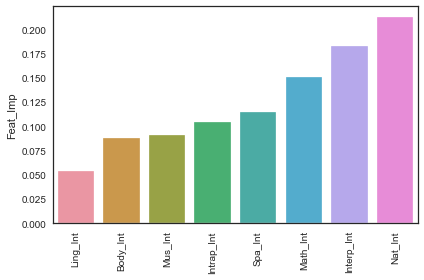

In [249]:
from xgboost import XGBRegressor

model = XGBRegressor(colsample_bytree=0.5,
                     learning_rate=0.1,
                     max_depth=3,
                     max_features=None,
                     n_estimators=30,
                     subsample=1)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")

sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## LGBM

### LGBMR & Best Number of "n_estimators"

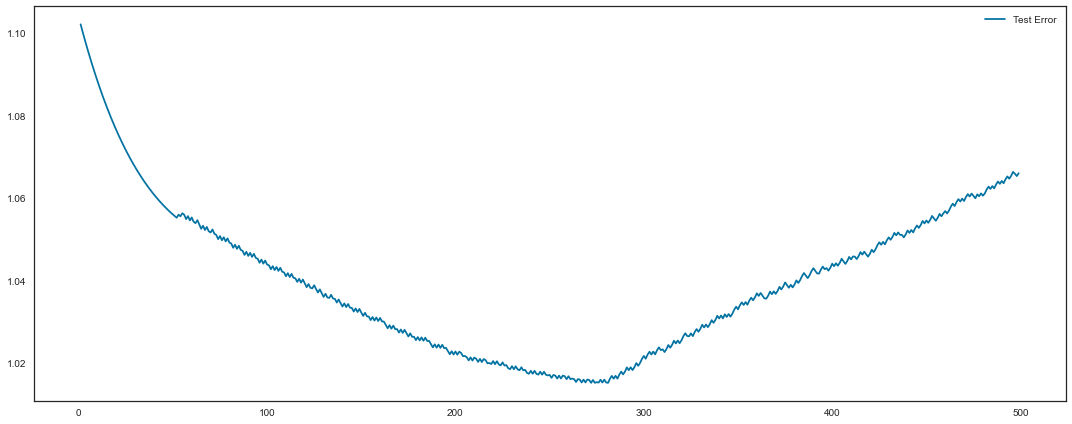

In [250]:
# lgbmr_model & No Scale Data 
# Best number of "n_estimators" = 200 (The same with the scaled data)
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
test_error = []

for n in range(1,500):
    model = LGBMRegressor(n_estimators=n,
                          max_depth=2,
                          max_features=None,
                          subsample=0.8,
                          learning_rate=0.01,
                          random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,500), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### LGBMR & GridSearchCV

In [251]:
# Best Params With NoScale Data
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [252]:
# lgbmr_mod for X_reg (Not scaled)

from lightgbm import LGBMRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = lgbmr_mod.predict(X_reg_test)
y_reg_train_prd = lgbmr_mod.predict(X_reg_train)

In [253]:
lgbmr_mod_scores = {"lgbmrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                    "lgbmrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

lgbmr_mod_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_scrs

,lgbmrm_trn,lgbmrm_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [254]:
# Best Params With MinMaxScale Data

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [255]:
# lgbmr_model for MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = lgbmr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = lgbmr_mod.predict(X_reg_train_min_scl)

In [256]:
lgbmr_mod_scores = {"lgbmrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                    "lgbmrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                      "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                      "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                      "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

lgbmr_mod_min_scl_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_min_scl_scrs

,lgbmrm_mms_trn,lgbmrm_mms_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [257]:
# Best Params With StandadScale Data

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [258]:
# lgbmr_model for StandadScale

from lightgbm import LGBMRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = lgbmr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = lgbmr_mod.predict(X_reg_train_std_scl)

In [259]:
lgbmr_mod_scores = {"lgbmrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                      "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                      "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                      "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                    "lgbmrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                      "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                      "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                      "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

lgbmr_mod_std_scl_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_std_scl_scrs

,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [260]:
lgbmr_mod_scrs = pd.concat([lgbmr_mod_scrs, lgbmr_mod_min_scl_scrs, lgbmr_mod_std_scl_scrs], axis=1)
lgbmr_mod_scrs

,lgbmrm_trn,lgbmrm_tst,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363
R2,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511
mae,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544
mse,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592


### LGBMR & CV

In [261]:
# lgbmr_mod & CV for X_reg (Not scaled)

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                            max_depth=2,
                            max_features=None,
                            n_estimators=300,
                            subsample=0.8)
scores_cv = cross_validate(lgbmr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [262]:
# lgbmr_mod & CV for X_reg MinMaxScaler

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                             max_depth=2,
                             max_features=None,
                             n_estimators=300,
                             subsample=0.8)
scores_mms_cv = cross_validate(lgbmr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [263]:
# lgbmr_model & CV for StandardScaler

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                             max_depth=2,
                             max_features=None,
                             n_estimators=300,
                             subsample=0.8)
scores_ss_cv = cross_validate(lgbmr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [264]:
lgbmr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
lgbmr_mod_cv_scrs.rename(columns={0:"lgbmr_cv_scr",
                                  1:"lgbmr_cv_mms_scr",
                                  2:"lgbmr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
lgbmr_mod_cv_scrs

,lgbmr_cv_scr,lgbmr_cv_mms_scr,lgbmr_cv_ss_scr
rmse,-12.196217,-12.196217,-12.196217
R2,-0.518380,-0.518380,-0.518380
mae,-10.677705,-10.677705,-10.677705
mse,-151.394415,-151.394415,-151.394415


In [265]:
lgbmr_mod_cum_scrs = pd.concat([lgbmr_mod_scrs, lgbmr_mod_cv_scrs], axis=1)
lgbmr_mod_cum_scrs.columns = ["lgbmrm_trn","lgbmrm_tst","lgbmr_cv_scr","lgbmrm_mms_trn","lgbmrm_mms_tst","lgbmr_cv_mms_scr","lgbmrm_ss_trn","lgbmrm_ss_tst","lgbmr_cv_ss_scr"]
lgbmr_mod_cum_scrs			

,lgbmrm_trn,lgbmrm_tst,lgbmr_cv_scr,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmr_cv_mms_scr,lgbmrm_ss_trn,lgbmrm_ss_tst,lgbmr_cv_ss_scr
rmse,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363,-12.196217,-12.196217,-12.196217
R2,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511,-0.518380,-0.518380,-0.518380
mae,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544,-10.677705,-10.677705,-10.677705
mse,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592,-151.394415,-151.394415,-151.394415


### LGBMR & Feature Importance

,Feat_Imp
Ling_Int,0
Math_Int,0
Spa_Int,0
Mus_Int,0
Body_Int,0
Interp_Int,0
Intrap_Int,0
Nat_Int,600


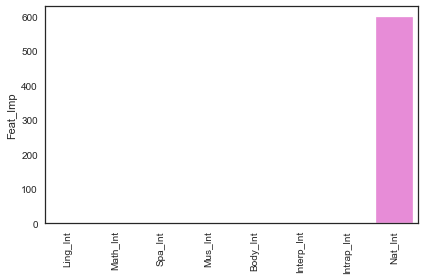

In [266]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(learning_rate=0.001,
                      max_depth=2,
                      max_features=None,
                      n_estimators=300,
                      subsample=0.8)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## ALL

### All

In [267]:
all_scrs = pd.concat([lin_mod_scrs,
                      rid_mod_scrs,
                      las_mod_scrs,
                      els_mod_scrs,
                      knnr_mod_scrs,
                      svr_mod_scrs,
                      dtr_mod_scrs,
                      rfr_mod_scrs,
                      Adar_mod_scrs,
                      Grdr_mod_scrs,
                      xgbr_mod_scrs,
                      lgbmr_mod_scrs],
                      axis=1)
#lgbmr_mod_cum_scrs.columns = ["lgbmrm_trn","lgbmrm_tst","lgbmr_cv_scr","lgbmrm_mms_trn","lgbmrm_mms_tst","lgbmr_cv_mms_scr","lgbmrm_ss_trn","lgbmrm_ss_tst","lgbmr_cv_ss_scr"]
all_scrs

,lm_trn,lm_tst,lm_mms_trn,lm_mms_tst,lm_ss_trn,lm_ss_tst,rm_trn,rm_tst,rm_mms_trn,rm_mms_tst,...,xgbrm_mms_trn,xgbrm_mms_tst,xgbrm_ss_trn,xgbrm_ss_tst,lgbmrm_trn,lgbmrm_tst,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221,11.866706,12.442072,11.876752,12.323480,...,9.102535,11.982605,9.102535,11.980123,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135777,0.021391,-0.114229,...,0.425171,-0.053441,0.425171,-0.053005,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958,10.111488,11.230004,10.184354,11.119722,...,7.100905,10.301390,7.100905,10.297643,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760,140.818708,154.805150,141.057235,151.868147,...,82.856141,143.582819,82.856141,143.523355,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592


In [268]:
all_scrs = all_scrs.T
all_scrs	

,rmse,R2,mae,mse
lm_trn,11.866705,0.023046,10.110832,140.818691
lm_tst,12.443221,-0.135987,11.230958,154.833760
lm_mms_trn,11.866705,0.023046,10.110832,140.818691
lm_mms_tst,12.443221,-0.135987,11.230958,154.833760
lm_ss_trn,11.866705,0.023046,10.110832,140.818691
...,...,...,...,...
lgbmrm_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_mms_trn,11.696354,0.050894,10.070134,136.804689
lgbmrm_mms_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_ss_trn,11.696354,0.050894,10.070134,136.804689


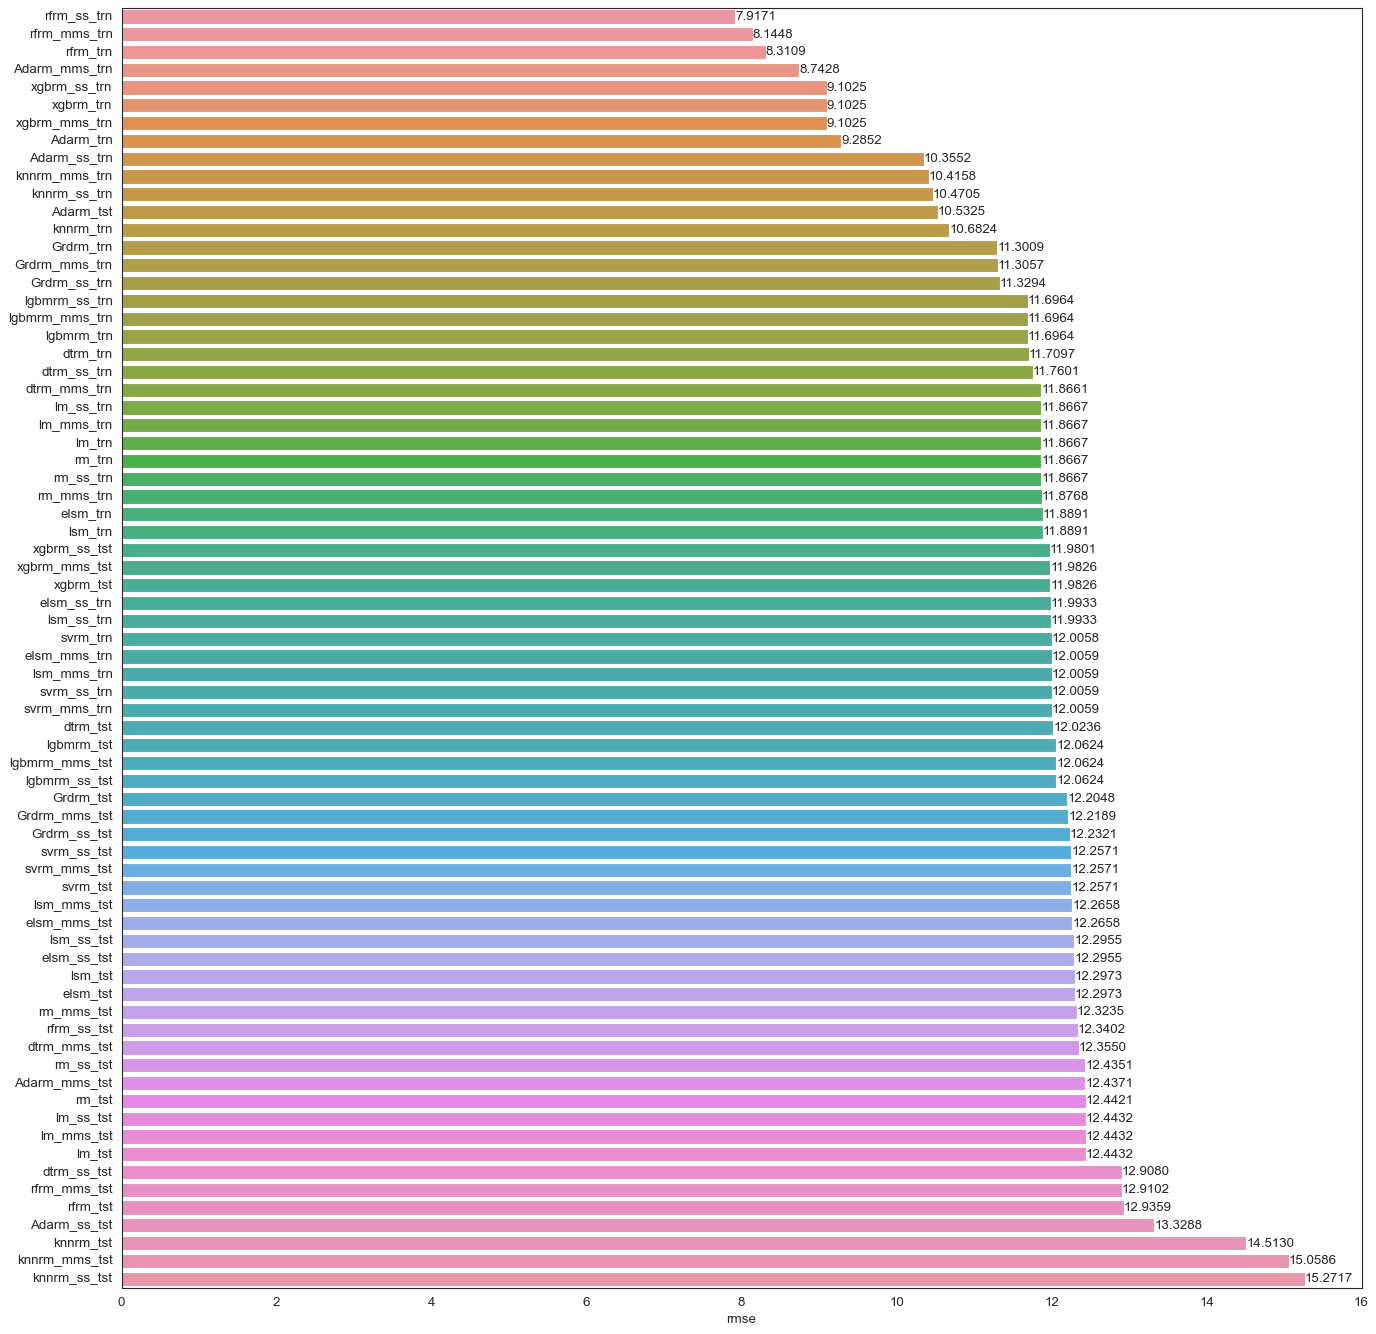

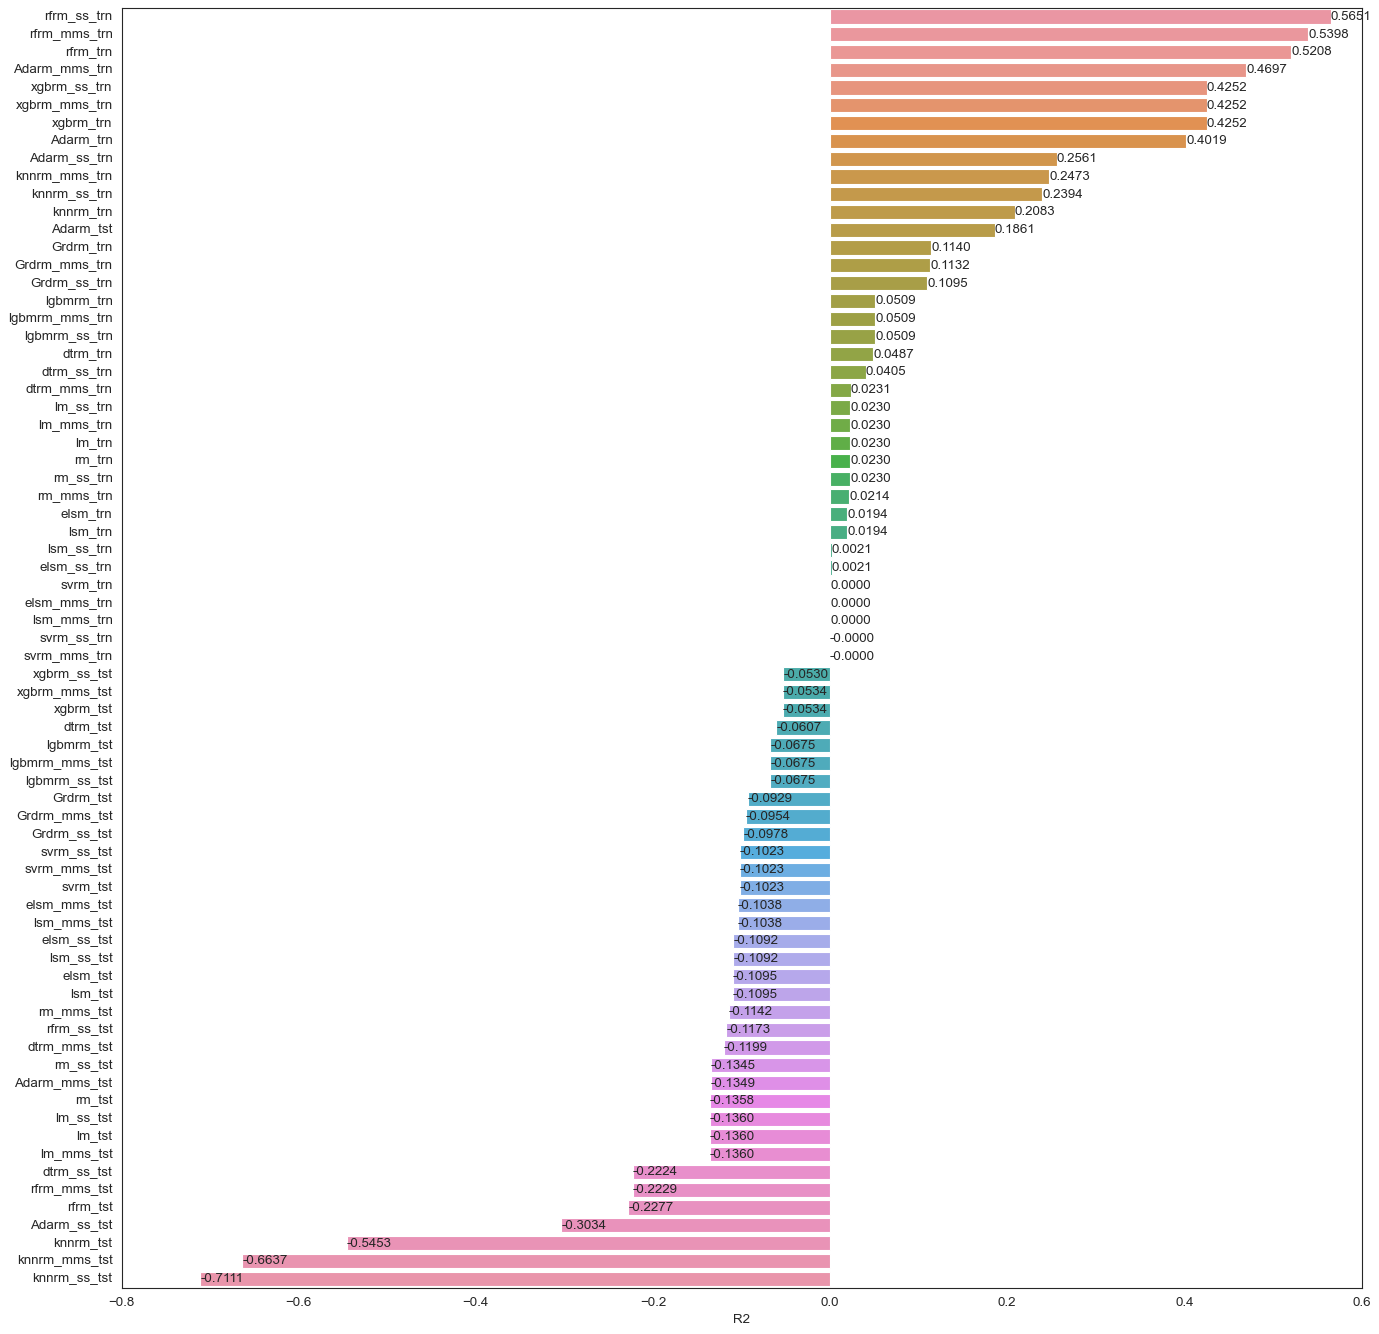

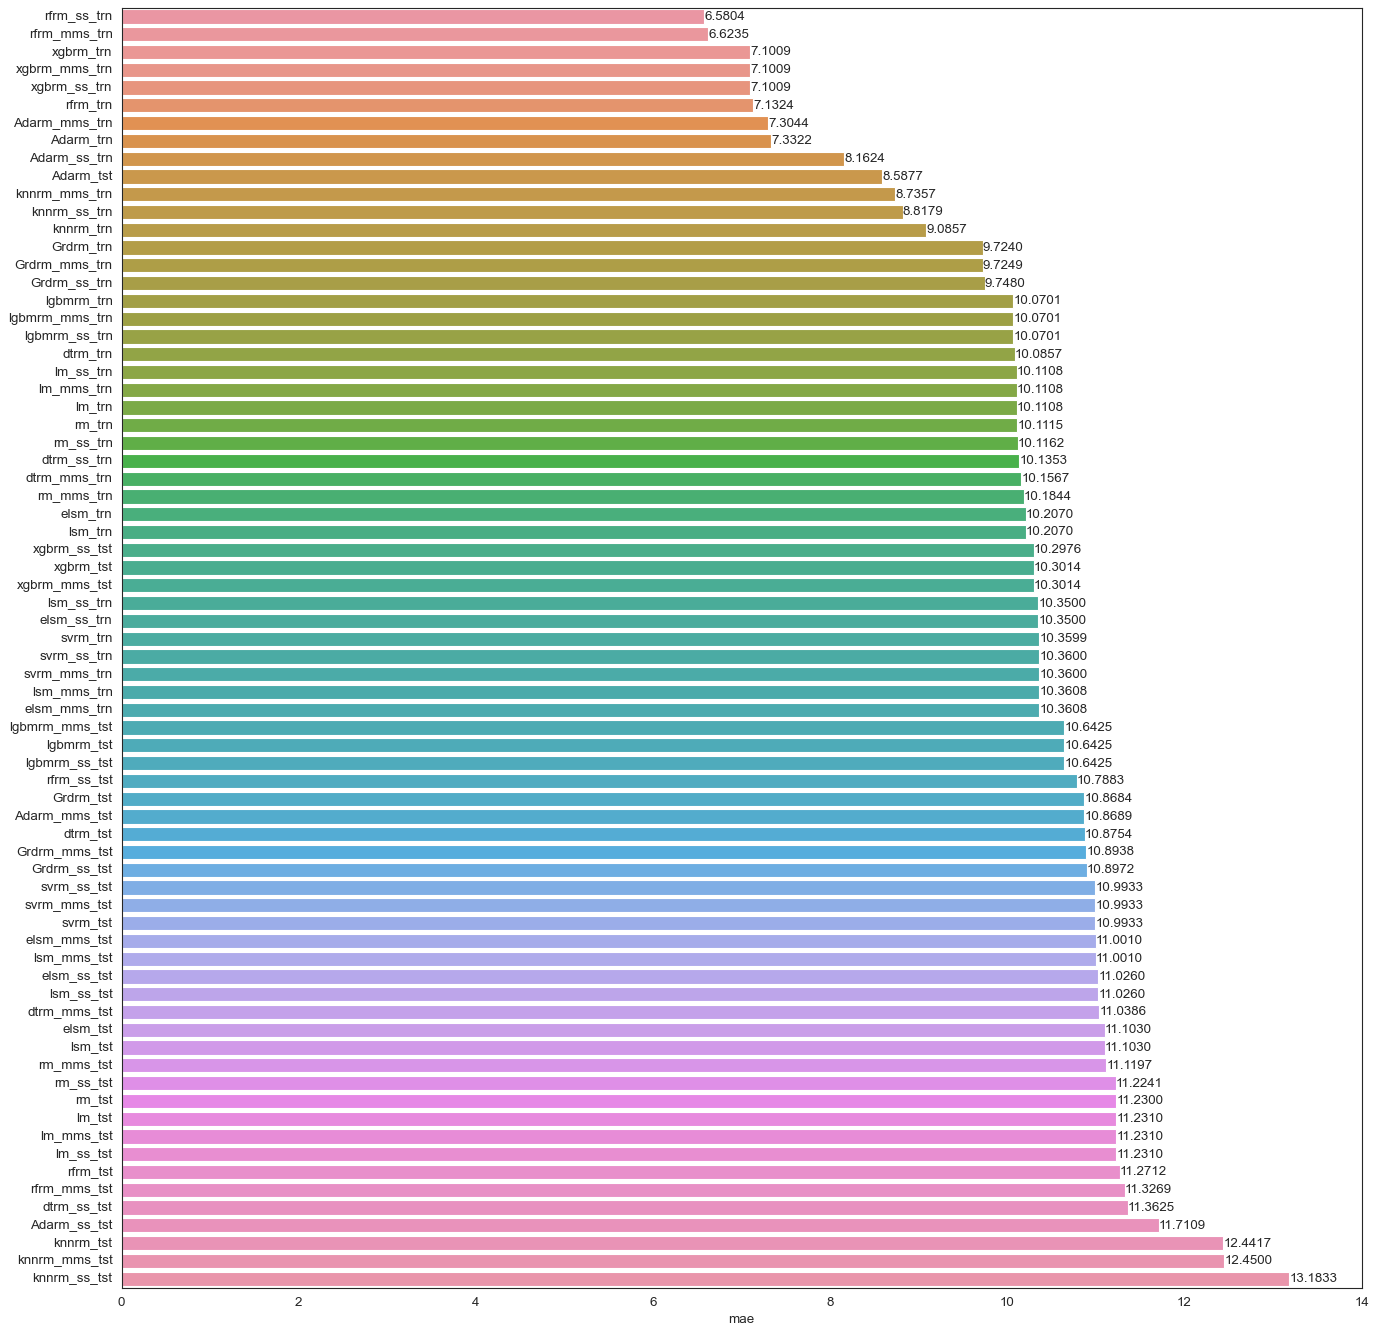

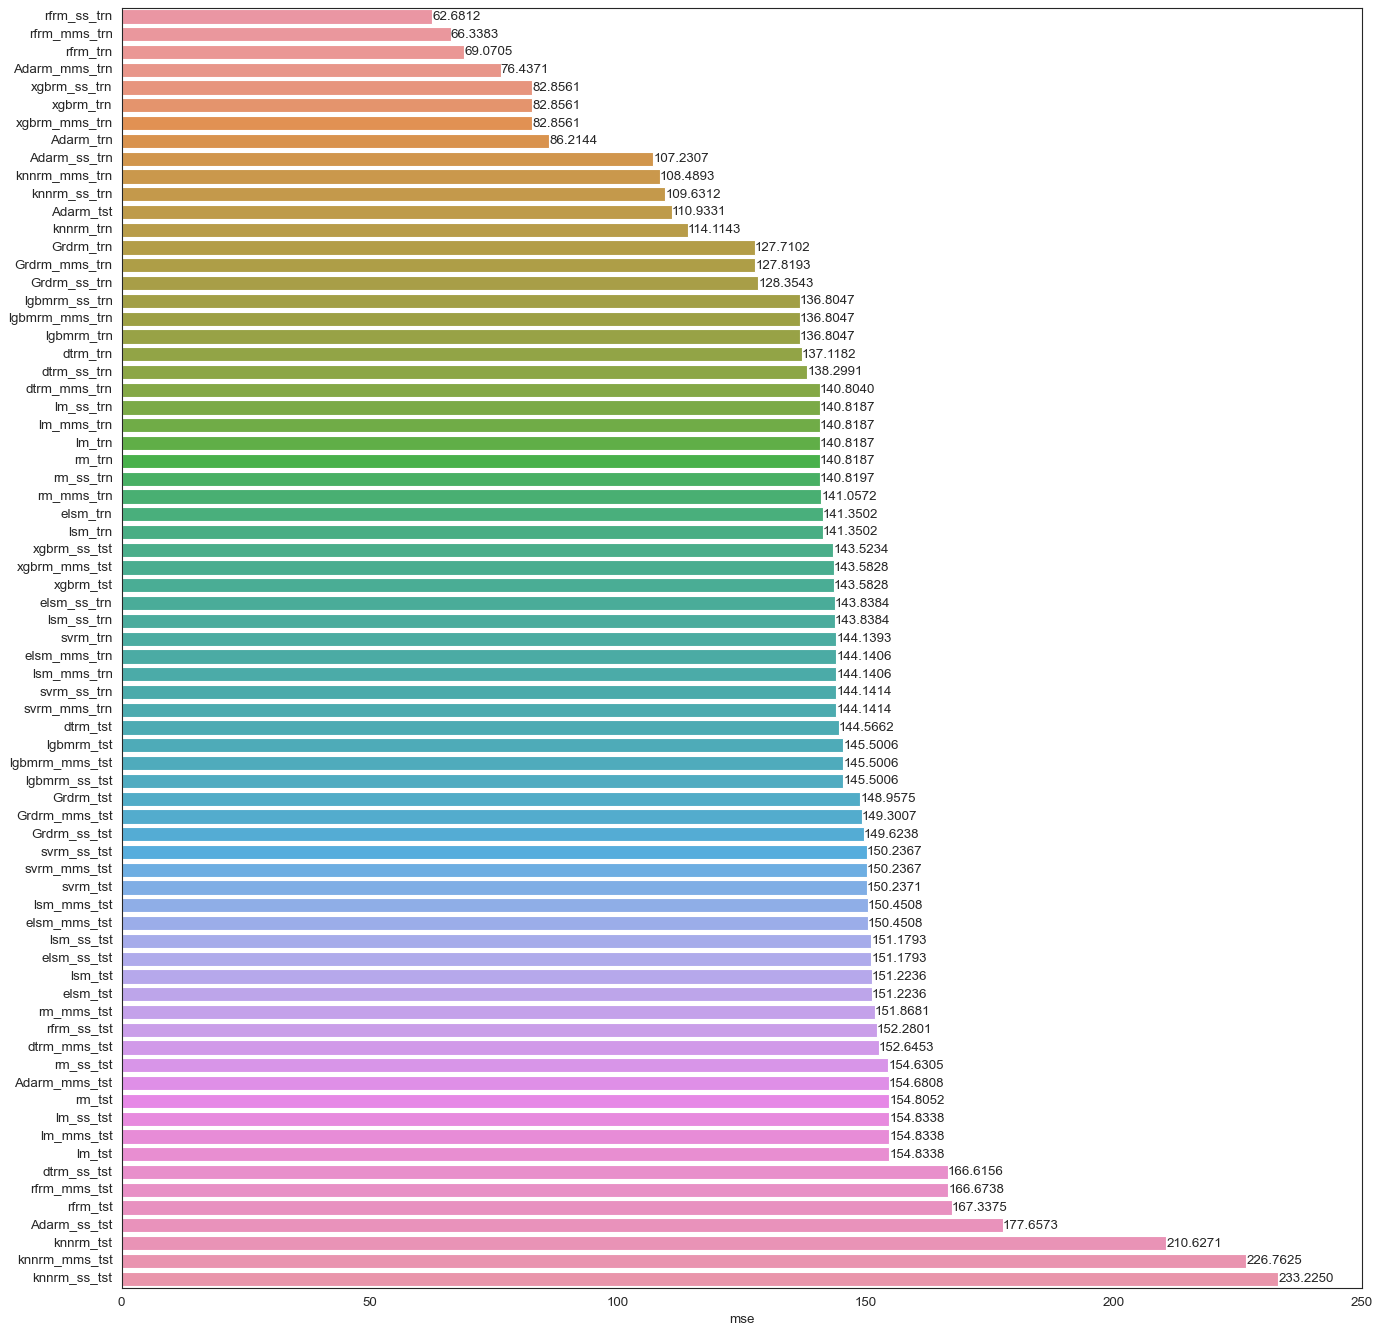

In [269]:
plt.style.use('classic')
sns.set_style("white")
metrics = all_scrs.columns
for i,j in enumerate(metrics):
    plt.figure(i, figsize=(20,20))
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = all_scrs.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 
plt.tight_layout;

## Final Model / Predict

In [270]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(max_depth=None,
                                    max_features="log2",
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    n_estimators=15)

final_model.fit(X_reg, y_reg)

RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=15)

In [271]:
columns_name = X_reg.columns

In [272]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [273]:
predictions = round(final_model.predict(pred_data)[0], 1)
predictions

71.7

In [274]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 71.7
Result		: Pilot
